

# SHAKEtime: Time-Dependent Earthquake Impact Assessment

**Description**  
The `SHAKEtime` class provides a unified framework to parse, analyze, and visualize the temporal evolution of USGS ShakeMap and PAGER products for a given earthquake event. It automates:

`last update: December, 2025`
`Version: 26.1`

---

- **Parsing ShakeMap XML grids** to extract metadata (e.g., event ID, magnitude, grid spacing) and timing information 
- **Computing summary statistics** (min, mean, max, std) for key intensity measures (MMI, PGA, PGV) and their uncertainties using pandas DataFrames
- **Parsing PAGER XML** to extract population exposure by MMI bin and estimate societal impact
- **Interpolating onto a unified grid** for direct comparison across versions using `scipy.interpolate.griddata`
- **Calculating absolute and relative rates of change** between consecutive ShakeMap versions  
- **Generating publication-quality visualizations** including:
  - Hazard Temporal Display (HTD) line plots with `matplotlib`   
  - Geospatial rate-of-change and uncertainty maps with `cartopy` 
  - Population exposure bar charts  
  - ShakeMap and PAGER probability distribution plots  

---

## Dependencies

- Python 3.x  
- pandas  
- numpy  
- scipy  
- matplotlib  
- cartopy  
- geopandas  
- xml (built-in)  
- Custom modules: `SHAKEmapper`, `SHAKEparser`, `SHAKEtime`, `SHAKEtools`

---



# Event Overview 

## Notebook Setup  
### Dock files Shakemap 

In [1]:
base_folder = 'event_data/SHAKEfetch'

event_id = 'us7000pn9s'         #'us7000pn9s' Myanmar ; 'us7000m9g4' Taiwan ; 'us6000jllz' Turkey 7.8 ;'us6000jlqa' Turkey 7.5 

if event_id == 'us7000pn9s': #Myanmar #
    event_id = 'us7000pn9s'
    event_epicenter_lon = 95.925
    event_epicenter_lat = 22.001
    version = '022'
    first_version = '001'
    event_time = '2025-03-28 06:20:52'

    shakemap_folder = "./event_data/SHAKEfetch/usgs-shakemap-versions"
    pager_folder = "./event_data/SHAKEfetch/usgs-pager-versions"
    rupture_folder = "./event_data/SHAKEfetch/usgs-rupture-versions"
    stations_folder = "./event_data/SHAKEfetch/usgs-instruments_data-versions"
    version_list = ['001', '002','003', '004','005','006', '007', '008','009', '011', '012','013','014','015','016','017','018','019','020','021','022']
    selected_cities = ['Mandalay', 'Nay Pyi Taw','Chiang Mai' ,'Taungoo','Bangkok']

    xml_shakemap_file_path = f"./{base_folder}/usgs-shakemap-versions/{event_id}/{event_id}_us_{version}_grid.xml"
    xml_firstshakemap_file_path = f"./{base_folder}/usgs-shakemap-versions/{event_id}/{event_id}_us_{first_version}_grid.xml"

    file_path_rupturedata = f'./{base_folder}/usgs-rupture-versions/{event_id}/{event_id}_us_{version}_rupture.json'  # Replace with actual file path
    
    file_path_instrument_data = f"./{base_folder}/usgs-instruments_data-versions/{event_id}/{event_id}_us_{version}_stationlist.json"
    file_path_dyfixml = f"./{base_folder}/usgs-dyfi-versions/{event_id}/us7000pn9s_us_1_cdi_geo_1km.txt"
    
    all_dists = (
            'normal',
            'lognorm',
            'gamma',
            'weibull',
            'burr')

    
elif event_id == 'us6000jllz': #Turkey 7.8
    event_id = 'us6000jllz'
    event_epicenter_lon = 37.014
    event_epicenter_lat = 37.226
    version = '017'
    first_version = '001'

    event_time = '2023-02-06 01:17:34'
    
    shakemap_folder = "./event_data/SHAKEfetch/usgs-shakemap-versions"
    pager_folder = "./event_data/SHAKEfetch/usgs-pager-versions"
    rupture_folder = "./event_data/SHAKEfetch/usgs-rupture-versions"
    stations_folder = "./event_data/SHAKEfetch/usgs-instruments_data-versions"
    
    version_list = ['001', '002','003', '004','006', '007', '008','009', '011', '012']
    version_list = ['001', '002','003', '004','005','006', '007', '008','009', '010','011', '012','013','014','015','016','017']
    selected_cities = ['Elbistan''Gaziantep', 'Sanliurfa','Kahramanmaras' ,'Kilis','Narli','Malatya','Diyarbakir','Antakya' ,'Adana','Aleppo','Elazig','Iskenderun']
    xml_shakemap_file_path = f"./{base_folder}/usgs-shakemap-versions/{event_id}/{event_id}_us_{version}_grid.xml"
    xml_firstshakemap_file_path = f"./{base_folder}/usgs-shakemap-versions/{event_id}/{event_id}_us_{first_version}_grid.xml"

    file_path_rupturedata = f'./{base_folder}/usgs-rupture-versions/{event_id}/{event_id}_us_{version}_rupture.json'  # Replace with actual file path
    file_path_instrument_data = f"./{base_folder}/usgs-instruments_data-versions/{event_id}/{event_id}_us_{version}_stationlist.json"
    file_path_dyfixml = f"./{base_folder}/usgs-dyfi-versions/{event_id}/{event_id}_us_1_cdi_geo_1km.txt"

    all_dists = ( #Taiwan
        'normal',
        'lognorm',
        'gamma',
        'beta',
        'genextreme',
        'pearson3',
        'burr')

elif event_id == 'us6000jlqa': #Turkey 7.5
    event_id = 'us6000jlqa'
    event_epicenter_lon = 37.196
    event_epicenter_lat = 38.011
    version = '016'
    first_version = '001'

    event_time = '2023-02-06 10:24:48'
    
    shakemap_folder = "./event_data/SHAKEfetch/usgs-shakemap-versions"
    pager_folder = "./event_data/SHAKEfetch/usgs-pager-versions"
    rupture_folder = "./event_data/SHAKEfetch/usgs-rupture-versions"
    stations_folder = "./event_data/SHAKEfetch/usgs-instruments_data-versions"
    
    version_list = ['001', '002','003', '004','005','006', '007', '008','009', '010','011', '012','013','014','015','016']
    selected_cities = ['Elbistan''Gaziantep', 'Sanliurfa','Kahramanmaras' ,'Kilis','Narli','Malatya','Diyarbakir','Antakya' ,'Adana','Aleppo','Elazig','Iskenderun']
    xml_shakemap_file_path = f"./{base_folder}/usgs-shakemap-versions/{event_id}/{event_id}_us_{version}_grid.xml"
    xml_firstshakemap_file_path = f"./{base_folder}/usgs-shakemap-versions/{event_id}/{event_id}_us_{first_version}_grid.xml"

    file_path_rupturedata = f'./{base_folder}/usgs-rupture-versions/{event_id}/{event_id}_us_{version}_rupture.json'  # Replace with actual file path
    file_path_instrument_data = f"./{base_folder}/usgs-instruments_data-versions/{event_id}/{event_id}_us_{version}_stationlist.json"
    file_path_dyfixml = f"./{base_folder}/usgs-dyfi-versions/{event_id}/{event_id}_us_1_cdi_geo_1km.txt"

    all_dists = (
        'normal',
        'lognorm',
        'gamma',
        'beta',
        'genextreme',
        'pearson3',
        'burr')


elif event_id == 'us7000m9g4': #Taiwan

    event_id = 'us7000m9g4'
    version = '012'
    first_version = '001'
    event_epicenter_lon = 121.598
    event_epicenter_lat = 23.835


    
    xml_shakemap_file_path = f"./{base_folder}/usgs-shakemap-versions/{event_id}/{event_id}_us_{version}_grid.xml"
    xml_firstshakemap_file_path = f"./{base_folder}/usgs-shakemap-versions/{event_id}/{event_id}_us_{first_version}_grid.xml"

    file_path_rupturedata = f'./{base_folder}/usgs-rupture-versions/{event_id}/{event_id}_us_{version}_rupture.json'  # Replace with actual file path
    
    file_path_instrument_data = f"./{base_folder}/usgs-instruments_data-versions/{event_id}/{event_id}_us_{version}_stationlist.json"
    file_path_dyfixml = f"./{base_folder}/usgs-dyfi-versions/{event_id}/{event_id}_us_3_cdi_geo_1km.txt"

    event_time = '2024-04-02 23:58:12'
    
    shakemap_folder = "./event_data/SHAKEfetch/usgs-shakemap-versions"
    pager_folder = "./event_data/SHAKEfetch/usgs-pager-versions"
    rupture_folder = "./event_data/SHAKEfetch/usgs-rupture-versions"
    stations_folder = "./event_data/SHAKEfetch/usgs-instruments_data-versions"
    
    version_list = ['001', '002','003', '004','006', '007', '008','009', '011', '012','013']
    
    selected_cities = ['Hualien City', 'Yilan', 'Banqiao','Taipei' ,'Taoyuan','Keelung']

    all_dists = ( #Taiwan
            'normal',
            'lognorm',
            'gamma',
            'weibull',
            'expon',
            'beta',
            'genextreme',
            'pearson3',
            'burr')



### Behaviour Settings 


In [2]:
#Event Overview 
instruments_data_map = False
dyfi_stationslist_data_map = False
dyfi_CDI_data_map = False
plot_shakemap_v1 = False 
plot_shakemap_stationslist_vf = False 
plot_shakemap_CDI_vf = False
plot_pgashakemap_vf = False 


#settings 
summary_cache = True
unigrid_cache = True
aux_cache = True

unified_grid_test = False

plot_ratemaps = False #
plot_shakemaps = False#
plot_shakemaps_std = False 

plot_pager =False #
plot_hazard_thd = False#
plot_overview_panels = False #
plot_auxiliary = False #
quantify_evolution = False #
create_evolution_panel = False

quantify_data_influence = True

compute_global_choas = False


In [3]:
from modules.SHAKEparser import *
from modules.SHAKEmapper import *
from modules.SHAKEtools import *



import os

output_path = f'./export/SHAKEtime/{event_id}/seismic_record_assessments'
os.makedirs(output_path, exist_ok=True)




In [4]:
shakemap_parser = USGSParser(parser_type="shakemap_xml", imt='mmi', xml_file=xml_shakemap_file_path)
shakemap_metadata = shakemap_parser.get_metadata()

map_extent = [shakemap_metadata['grid_specification']['lon_min'], shakemap_metadata['grid_specification']['lon_max'],
              shakemap_metadata['grid_specification']['lat_min'], shakemap_metadata['grid_specification']['lat_max']]

map_extent = [float(s) for s in map_extent]


## Get Rupture Data 

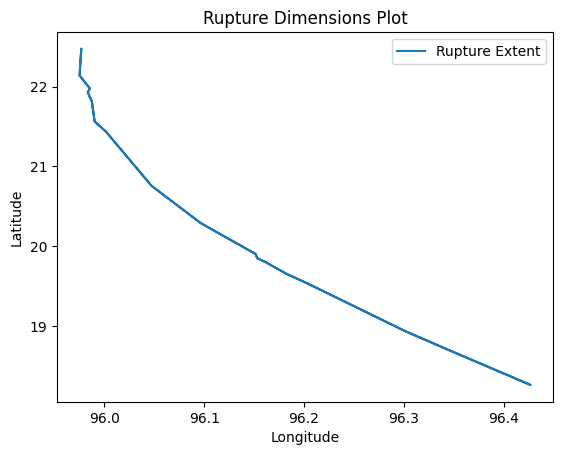

In [5]:
#Parse Rupture data 
rupture_parser = USGSParser(parser_type='rupture_json', mode='parse',rupture_json=file_path_rupturedata)
# Extract rupture coordinates from the parser.
rupture_x_coords, rupture_y_coords = rupture_parser.get_rupture_xy()

# Plotting function
fig, ax = plt.subplots()
ax.plot(rupture_x_coords, rupture_y_coords, '-', label='Rupture Extent')
ax.set_title('Rupture Dimensions Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()

## Get Instruments Data 

In [6]:
# Parse Instruments Data 
instrument_parser = USGSParser(parser_type = 'instrumented_data',json_file=file_path_instrument_data)
instruments_data = instrument_parser.get_dataframe(value_type='pga')

print(instruments_data.columns)

# Show maximum values 
# Step 1: Find the index of the maximum value in the 'pga' column
max_pga_index = instruments_data['pga'].idxmax()

# Step 2: Retrieve and print the row with the maximum 'pga'
max_pga_row = instruments_data.loc[max_pga_index]
print("Row with the maximum PGA value:")
print(max_pga_row)

Index(['id', 'station_code', 'instrumentType', 'commType', 'station_name',
       'longitude', 'latitude', 'location', 'source', 'network',
       'station_type', 'vs30', 'elev', 'distance', 'rrup', 'repi', 'rhypo',
       'rjb', 'intensity', 'intensity_flag', 'intensity_stddev',
       'pga_selected', 'pgv_selected', 'predictions', 'mmi_from_pgm',
       'channel_number', 'HNE', 'HNN', 'HNZ', 'pga', 'pga_unit'],
      dtype='object')
Row with the maximum PGA value:
id                                                             GE.NPW
station_code                                                      NPW
instrumentType                                                    UNK
commType                                                          UNK
station_name                    DMH/GEOFON Station Naypyitaw, Myanmar
longitude                                                      96.138
latitude                                                       19.779
location                               

In [7]:
from modules.SHAKEtools import AccelerationUnitConverter

# convert units
converter = AccelerationUnitConverter()
instruments_data['HNE'] = converter.convert_unit(instruments_data['HNE'],'%g','cm/s2')
instruments_data['HNN'] = converter.convert_unit(instruments_data['HNN'],'%g','cm/s2')
instruments_data['HNZ'] = converter.convert_unit(instruments_data['HNZ'],'%g','cm/s2')
instruments_data['pga'] = converter.convert_unit(instruments_data['pga'],'%g','cm/s2')
instruments_data['pga_selected'] = converter.convert_unit(instruments_data['pga'].replace('null', np.nan),'%g','cm/s2')


instruments_data['pga_unit'] = 'cm/s2'

### Instruments Data Statistical Analysis 

In [8]:
if instruments_data_map:
    import matplotlib.ticker as ticker

    marker_size = 30


    plt.style.use('./bins/instruments_data.mplstyle')
    
    
    plt.plot(instruments_data['distance'],
                                  instruments_data['HNZ'],
                                  'k^',mfc='k',markersize=marker_size, label = 'Vertical component')
    
    
    # Compute the max of HNE and HNN for each row
    max_H = instruments_data[['HNE', 'HNN']].min(axis=1)  # :contentReference[oaicite:0]{index=0}
    plt.plot(instruments_data['distance'],
                                  max_H,
                                  'k^',mfc='yellow',markersize=marker_size, label = 'Horizontal component')
    
    plt.plot(instruments_data['distance'],
                                  instruments_data['pga_selected'].replace('null', np.nan),
                                  'k^',mfc='r',markersize=marker_size, label = 'PGA')
    
    
    plt.grid()
    plt.legend()
    
    # set axis scale 
    plt.xscale('log', base=10)
    plt.yscale('log',base=10)
    
    # Customize tick labels to scalar format
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    
    # Ensure that every tick label is formatted in scalar (no scientific notation)
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_scientific(False)
    
    ax.set_axisbelow(True)
    ax.grid(
        True,
        linestyle='--',
        color='gray',
        linewidth=0.3,
        alpha=0.7
    )
    
    #set label sizes 
    plt.xlabel('Epicentral Distance [$km$]')
    plt.ylabel('PGA [$cm/s^2$]')
    
    #axis bounds 
    ticksx = [10,30, 40, 60, 100, 200, 300,500]
    ticksy = [10,100,500]
    
    plt.xticks(ticksx)
    plt.yticks(ticksy)
    
    
    plt.savefig(f"{output_path}/{event_id}_SeismicStationrecords_{version}.png", bbox_inches='tight')
    plt.savefig(f"{output_path}/{event_id}_SeismicStationrecords_{version}.pdf", bbox_inches='tight')

    

In [9]:
if instruments_data_map:


    from modules.SHAKEstats import *
    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    result = plotdata_empirical_cdf(
        event_id=event_id,
        df=instruments_data,
        column='pga',unit='cm/s²',
        log_transform=True,
        #compare_dists=['lognorm', 'gamma'],
        compute_best_fit=True,
        marker_color='black',
        show_title=False,
        marker_size=20,
        output_path='./export',
        save_formats=['png', 'pdf'],
        name='empiricalcdf_pga',
        figsize=(24, 15),    
        cdf_marker='o',
        linewidth=5, y_label = ' Cumulative Probability'
    
    )
    
    
    print("Best fit distribution:", result['best_fit'])
    print("KS statistic:", result['ks_stat'])


In [10]:
if instruments_data_map:
    
    
    from modules.SHAKEstats import *
    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    
    results = plotdata_residuals(
        df=instruments_data,
        x='distance',
        y='pga',
        vs30_col='vs30',
        log_y=True,
        marker='^',
        color='green',
        s=800,
        output_path='./export',save_formats=['png', 'pdf'],
        event_id=event_id,
        name='residuals_pga',unit_y='cm/s2', x_ticks=[10,50,100,200,400],
        show_title=False, 
        x_label='Epicentral Distance [$km$]',
        y_label='Residuals (log(pga) [$cm/s²$])',
        markeredge_width=3,
        figsize=(24,15),legend_loc='lower right') #, legend_loc='upper left'


In [11]:
if instruments_data_map:

    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    
    plotdata_qq_pp(
        df=instruments_data,
        column='pga',    log_if_skewed=True,
        dist_name='normal',  # or None to auto-detect
        name_prefix='quantile_pga',
        output_path='./export',
        event_id=event_id,
        save_formats=['png', 'pdf'],
        figsize=(24, 15), 
        show_title=False,marker_size=25
    )


In [12]:
if instruments_data_map:
    
    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    
    
    result = plotdata_histogram(
        df=instruments_data,
        column='pga',
        log_transform=True,
        unit='cm/s²',
        scoring_method='ks',  # or 'aic', 'bic', or None
        output_path='./export',
        save_formats=['png', 'pdf'], 
        figsize = (24,15),
        event_id=event_id, name = 'histogramPDF_pga', 
        linewidth= 5, 
        alpha = 0.6,
        show_title = False)

In [13]:
if instruments_data_map:
    
    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    ci_method_used = 'residual'
    
    results = plotdata_attenuation(
        df=instruments_data,
        vs30_col='vs30',
        fit='nonlinear',
        ci_method=ci_method_used,   # Try: 'binwise', 'loess', or 'residual'
        log_x=True,
        log_y=True,
        show_confidence=True,
        unit_y='cm/s²',
        output_path='./export',
        event_id=event_id,
        name=f'attenuation_pga_{ci_method_used}',
        return_values=True,
        s=800,
        marker='^',  # 'o' for circle, '^' for triangle, 's' for square
        figsize=(24, 15),alpha=1,
        save_formats=['png', 'pdf'],x_ticks=[10,50,100,200,400],show_title=False,
        legend_marker_size=25,
        markeredge_width=2, x_label = 'Epicentral Distance [$km$]')
    
    print("Params:", results['params'])
    print("Residuals:", results['residuals'][:5])

In [14]:
# Example usage:
if instruments_data_map:
    mapper = SHAKEmapper()
    mapper.set_extent(map_extent)
    
    fig, ax = mapper.create_basemap()  #([90.4, 103.4, 13.0, 26.8])
    
    #mapper.add_vs30_layer()
    plt.style.use('./bins/latex_shakemap_style.mplstyle')


    mapper.add_vs30_layer()
    mapper.add_stations(instruments_data['longitude'],instruments_data['latitude'])
        

    mapper.add_cities(population=1000000)
    
    mapper.update_legend(alpha=0.9)

    mapper.add_epicenter(float(shakemap_metadata['event']['lon']),float(shakemap_metadata['event']['lat']))


    plt.savefig(f"{output_path}/{event_id}_SeismicStations_map_{version}.png", bbox_inches='tight')
    plt.savefig(f"{output_path}/{event_id}_SeismicStations_map_{version}.pdf", bbox_inches='tight')



    
    plt.show()

## Get DYFI? Data 

### DYFI? data from stationlist.json

In [15]:
# Parse Instruments Data 
dyfi_parser = USGSParser(parser_type = 'instrumented_data',json_file=file_path_instrument_data)
dyfi_data_stationslist = dyfi_parser.get_dataframe(value_type='mmi')

print(dyfi_data_stationslist.columns)

# this will turn non‐parseable values (like "null") into actual NaN
dyfi_data_stationslist['intensity'] = pd.to_numeric(
    dyfi_data_stationslist['intensity'], errors='coerce'
)  # :contentReference[oaicite:0]{index=0}

# also ensure 'distance' is numeric
dyfi_data_stationslist['distance'] = pd.to_numeric(
    dyfi_data_stationslist['distance'], errors='coerce'
)

# drop any rows that became NaN in either column
dyfi_data_stationslist.dropna(
    subset=['intensity', 'distance'], inplace=True
)

Index(['id', 'station_code', 'instrumentType', 'commType', 'station_name',
       'longitude', 'latitude', 'location', 'source', 'network',
       'station_type', 'nresp', 'vs30', 'intensity', 'intensity_flag',
       'intensity_stddev', 'elev', 'distance', 'rrup', 'repi', 'rhypo', 'rjb',
       'predictions', 'mmi_from_pgm', 'channel_number'],
      dtype='object')


In [16]:
dyfi_data_stationslist

,id,station_code,instrumentType,commType,station_name,longitude,latitude,location,source,network,...,intensity_stddev,elev,distance,rrup,repi,rhypo,rjb,predictions,mmi_from_pgm,channel_number
0,DYFI.UTM:(47P 0661 1521 1000),UTM:(47P 0661 1521 1000),OBSERVED,UNK,None,100.4938,13.7583,,USGS (Did You Feel It?),DYFI,...,0.311,None,660.554,660.554,1036.046,1036.094,661.164,"[{'name': 'sa(1.0)', 'value': 1.3818, 'value_r...",None,0
1,DYFI.UTM:(47P 0661 1538 1000),UTM:(47P 0661 1538 1000),OBSERVED,UNK,None,100.4948,13.9120,,USGS (Did You Feel It?),DYFI,...,0.311,None,647.844,647.844,1020.917,1020.966,648.436,"[{'name': 'sa(1.0)', 'value': 1.5132, 'value_r...",None,0
2,DYFI.UTM:(47P 0662 1521 1000),UTM:(47P 0662 1521 1000),OBSERVED,UNK,None,100.5030,13.7583,,USGS (Did You Feel It?),DYFI,...,0.095,None,661.200,661.200,1036.500,1036.548,661.811,"[{'name': 'sa(1.0)', 'value': 1.379, 'value_ro...",None,0
3,DYFI.UTM:(47P 0663 1516 1000),UTM:(47P 0663 1516 1000),OBSERVED,UNK,None,100.5120,13.7130,,USGS (Did You Feel It?),DYFI,...,0.311,None,665.629,665.629,1041.426,1041.474,666.246,"[{'name': 'sa(1.0)', 'value': 1.3753, 'value_r...",None,0
4,DYFI.UTM:(47P 0663 1533 1000),UTM:(47P 0663 1533 1000),OBSERVED,UNK,None,100.5130,13.8667,,USGS (Did You Feel It?),DYFI,...,0.293,None,652.887,652.887,1026.292,1026.340,653.486,"[{'name': 'sa(1.0)', 'value': 1.5459, 'value_r...",None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,DYFI.UTM:(48P 0188 1657 1000),UTM:(48P 0188 1657 1000),OBSERVED,UNK,None,102.1039,14.9741,,USGS (Did You Feel It?),DYFI,...,0.293,None,705.373,705.373,1017.085,1017.134,706.046,"[{'name': 'sa(1.0)', 'value': 0.954, 'value_ro...",None,0
167,DYFI.UTM:(48P 0685 1192 1000),UTM:(48P 0685 1192 1000),OBSERVED,UNK,None,106.6966,10.7830,,USGS (Did You Feel It?),DYFI,...,0.311,None,1376.861,1376.861,1694.362,1694.391,1378.404,"[{'name': 'sa(1.0)', 'value': 0.0484, 'value_r...",None,0
168,DYFI.UTM:(48Q 0247 1987 1000),UTM:(48Q 0247 1987 1000),OBSERVED,UNK,None,102.6159,17.9611,,USGS (Did You Feel It?),DYFI,...,0.293,None,654.943,654.943,830.918,830.978,655.542,"[{'name': 'sa(1.0)', 'value': 1.0128, 'value_r...",None,0
169,DYFI.UTM:(48Q 0264 1926 1000),UTM:(48Q 0264 1926 1000),OBSERVED,UNK,None,102.7831,17.4120,,USGS (Did You Feel It?),DYFI,...,0.311,None,679.277,679.277,880.585,880.642,679.911,"[{'name': 'sa(1.0)', 'value': 1.1614, 'value_r...",None,0


In [17]:
from modules.SHAKEstats import *

if dyfi_stationslist_data_map:

    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    
    results = plotdata_residuals(
        df=dyfi_data_stationslist,
        x='distance',
        y='intensity',
        vs30_col='vs30',
        log_y=True,
        marker='o',
        color='green',
        s=800,
        output_path='./export',save_formats=['png', 'pdf'],
        event_id=event_id,
        name='residuals_dyfistationslist_mmi',unit_y='MMI', x_ticks=[10,100,200,400],
        show_title=False, 
        x_label='Epicentral Distance [$km$]',
        y_label='Residuals (DYFI? [$log(MMI)$])',
        legend_loc='lower right',     markeredge_width=3,
        figsize=(24, 15))

In [18]:
if dyfi_stationslist_data_map:

    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    result = plotdata_empirical_cdf(
        event_id=event_id,
        df=dyfi_data_stationslist,
        column='intensity',unit='MMI',
        log_transform=False,
        #compare_dists=['lognorm', 'gamma'],
        compute_best_fit=True,
        marker_color='black',
        show_title=False,
        marker_size=20,
        output_path='./export',
        save_formats=['png', 'pdf'],name='empiricalcdf_dyfistationslist_mmi',
        figsize=(24, 15),    
        cdf_marker='o',
        linewidth=5, x_label = 'Intensity [MMI]', y_label = ' Cumulative Probability'
    
    )
    
    
    print("Best fit distribution:", result['best_fit'])
    print("KS statistic:", result['ks_stat'])

In [19]:
if dyfi_stationslist_data_map:
    plt.style.use('./bins/datastats_analysis.mplstyle')

    
    plotdata_qq_pp(
        df=dyfi_data_stationslist,
        column='intensity',
        log_if_skewed=True,
        dist_name='normal',  # or None to auto-detect
        name_prefix='quantile_dyfistationslist_mmi',
        output_path='./export',
        event_id=event_id,
        save_formats=['png', 'pdf'],figsize=(24, 15), show_title=False
    )



In [20]:
if dyfi_stationslist_data_map:
    plt.style.use('./bins/datastats_analysis.mplstyle')

    
    result = plotdata_histogram(
        df=dyfi_data_stationslist,
        column='intensity',
        log_transform=False,
        unit='MMI',
        scoring_method='ks',  # or 'aic', 'bic', or None
        output_path='./export',
        save_formats=['png', 'pdf'], 
        figsize = (24,16),
        event_id=event_id, name = 'HistogramPDF_dyfistationslist_mmi', 
        linewidth= 5, 
        alpha = 0.6,
        show_title = False, x_label = 'Intensity [$MMI$]'
    )

In [21]:
if dyfi_stationslist_data_map:

    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    ci_method_used = 'residual'
    
    results = plotdata_attenuation(
        df=dyfi_data_stationslist,
        x= 'distance',
        y= 'intensity',
        vs30_col='vs30',
        fit='nonlinear',
        ci_method=ci_method_used,   # Try: 'binwise', 'loess', or 'residual'
        log_x=True,
        log_y=True,
        show_confidence=True,
        unit_y='MMI',
        output_path='./export',
        event_id=event_id,
        name=f'attenuation_dyfisttaionslist_mmi_{ci_method_used}',
        return_values=True,
        s=500,
        marker='o',  # 'o' for circle, '^' for triangle, 's' for square
        figsize=(24, 15),alpha=1,
        save_formats=['png', 'pdf'],
        x_ticks=[10,50,100,200,400],
        y_ticks=[3,4,5,6,8,10],
        show_title=False,legend_marker_size=25, x_label ='Epicentral Distance [$km$]', y_label = 'Intensity [$MMI$]')
    
    print("Params:", results['params'])
    print("Residuals:", results['residuals'][:5])

In [22]:
if dyfi_stationslist_data_map:

    
    import matplotlib.ticker as ticker
    
    
    
    plt.style.use('./bins/intensity_data.mplstyle')
    
    from modules.SHAKEtools import contour_scale
    
    cmap,bounds, ticks, norm, used_scale = contour_scale('mmi')
    
    
    # this will turn non‐parseable values (like "null") into actual NaN
    dyfi_data_stationslist['intensity'] = pd.to_numeric(
        dyfi_data_stationslist['intensity'], errors='coerce'
    )  # :contentReference[oaicite:0]{index=0}
    
    # also ensure 'distance' is numeric
    dyfi_data_stationslist['distance'] = pd.to_numeric(
        dyfi_data_stationslist['distance'], errors='coerce'
    )
    
    # drop any rows that became NaN in either column
    dyfi_data_stationslist.dropna(
        subset=['intensity', 'distance'], inplace=True
    )
    
    
    
    
    # Create scatter plot
    fig, ax = plt.subplots()
    sc = ax.scatter(
        dyfi_data_stationslist['distance'], dyfi_data_stationslist['intensity'],
        c=np.asarray(dyfi_data_stationslist['intensity']), cmap=cmap, norm=norm,
        marker='o',
        s=800,edgecolors='black',
        linewidths=2, label = 'DYFI?'
    )
    
    
    
    #plt.plot(dyfi_data['dist'],dyfi_data['intensity'],
    #                              '.',mfc='gray',markersize=20, label = 'Intenisty Component')
    
    
    #set label sizes 
    plt.xlabel('Epicentral Distance [$km$]')
    plt.ylabel('MMI')
    
    
    # Add colorbar for intensity
    cb = plt.colorbar(sc, ax=ax)
    cb.set_label('MMI')
    
    
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    
    
    # Now save the figures
    plt.savefig(f"{output_path}/{event_id}_dyfi_stationslist_{version}.png", bbox_inches='tight', dpi=400)
    plt.savefig(f"{output_path}/{event_id}_dyfi_stationslist_{version}.pdf", bbox_inches='tight', dpi=400)
    
    
    
    plt.show()

In [23]:
# Example usage:
if dyfi_stationslist_data_map:
    mapper = SHAKEmapper()
    mapper.set_extent(map_extent)
    
    fig, ax = mapper.create_basemap()  #([90.4, 103.4, 13.0, 26.8])
    
    #mapper.add_vs30_layer()
    plt.style.use('./bins/latex_shakemap_style.mplstyle')


    mapper.add_vs30_layer()
    mapper.add_dyfi(dyfi_data_stationslist['longitude'],dyfi_data_stationslist['latitude'],dyfi_data_stationslist['intensity'])
    mapper.add_epicenter(float(shakemap_metadata['event']['lon']),float(shakemap_metadata['event']['lat']))
  

    mapper.add_cities(population=1000000)
    
    mapper.update_legend(alpha=0.9)

    plt.savefig(f"{output_path}/{event_id}_dyfi_data_stationslist_map_{version}.png", bbox_inches='tight', dpi=400)
    plt.savefig(f"{output_path}/{event_id}_dyfi_data_stationslist_map_{version}.pdf", bbox_inches='tight', dpi=400)


    
    plt.show()


### DYFI? from CDI 

In [24]:
# Parse did you feel it data 

dyfi_parser = USGSParser(parser_type='dyfi_data', file_path=file_path_dyfixml)
dyfi_data = dyfi_parser.get_dataframe()
dyfi_data

Auto-detected file type: 3


,Geocoded box,CDI,No. of responses,Hypocentral distance,Latitude,Longitude,Suspect?,Standard deviation,City,State
0,UTM:(43P 0785 1455 1000),2.2,1,2174,13.1525,77.6335,0,0.33,UTM:(43P 0785 1455 1000),NaN
1,UTM:(43Q 0439 1813 1000),3.8,1,2343,16.4021,74.4334,0,0.33,UTM:(43Q 0439 1813 1000),NaN
2,UTM:(43R 0715 3169 1000),2.0,1,2023,28.6347,77.2045,0,0.33,UTM:(43R 0715 3169 1000),NaN
3,UTM:(44N 0379 0742 1000),1.0,1,2417,6.7161,79.9097,0,0.33,UTM:(44N 0379 0742 1000),NaN
4,UTM:(44Q 0629 1850 1000),3.4,1,1553,16.7338,82.2148,0,0.33,UTM:(44Q 0629 1850 1000),NaN
...,...,...,...,...,...,...,...,...,...,...
1228,UTM:(50T 0449 4431 1000),1.0,1,2796,40.0322,116.4081,0,0.33,UTM:(50T 0449 4431 1000),NaN
1229,UTM:(51P 0289 1638 1000),2.0,1,2770,14.8125,121.0440,0,0.33,UTM:(51P 0289 1638 1000),NaN
1230,UTM:(51R 0238 3355 1000),1.0,1,2603,30.3030,120.2809,0,0.33,UTM:(51R 0238 3355 1000),NaN
1231,UTM:(51R 0339 2763 1000),2.0,1,2624,24.9785,121.4099,0,0.33,UTM:(51R 0339 2763 1000),NaN


In [25]:
# Step 1: Calculate epicentral distance for each point
dyfi_data["Epicentral distance"] = haversine_distance(
    lon1=dyfi_data["Longitude"],
    lat1=dyfi_data["Latitude"],
    lon2=event_epicenter_lon,
    lat2=event_epicenter_lat)


# Step 2: Filter the DataFrame to remove points more than 400 km from the epicenter
dyfi_data_filtered = dyfi_data[dyfi_data["Epicentral distance"] <= 500].copy()


from modules.SHAKEmapper import *

# Initialize mapper
mapper = SHAKEmapper()

# Extract Vs30 and assign as a new column in dyfi_data
dyfi_data_filtered["vs30"] = mapper.extract_vs30_data(
    lons=dyfi_data_filtered["Longitude"],
    lats=dyfi_data_filtered["Latitude"]
)["point_values"]


# Normalize string-based NULL representations to real NaN
dyfi_data_filtered = dyfi_data_filtered.replace(
    ["NULL", "null", "None", "none", "", "nan", "NaN"],
    np.nan
)

# Remove rows with any remaining NaN / None in critical columns
dyfi_data_filtered = (
    dyfi_data_filtered
    .dropna(subset=[
        "Longitude",
        "Latitude",
        "Epicentral distance",
        "vs30"
    ])
    .reset_index(drop=True)
)



dyfi_data_filtered

,Geocoded box,CDI,No. of responses,Hypocentral distance,Latitude,Longitude,Suspect?,Standard deviation,City,State,Epicentral distance,vs30
0,UTM:(46Q 0377 2473 1000),3.8,1,426,22.3631,91.8102,0,0.330,UTM:(46Q 0377 2473 1000),NaN,425.576398,307.381104
1,UTM:(46Q 0378 2478 1000),3.1,1,425,22.4083,91.8195,0,0.330,UTM:(46Q 0378 2478 1000),NaN,425.061304,346.179535
2,UTM:(46Q 0379 2469 1000),2.7,1,424,22.3270,91.8299,0,0.330,UTM:(46Q 0379 2469 1000),NaN,423.248751,296.897919
3,UTM:(46Q 0395 2370 1000),3.4,1,411,21.4338,91.9916,0,0.330,UTM:(46Q 0395 2370 1000),NaN,411.181853,356.621643
4,UTM:(46Q 0528 2252 1000),5.0,1,329,20.3704,93.2731,0,0.330,UTM:(46Q 0528 2252 1000),NaN,329.336132,373.152283
...,...,...,...,...,...,...,...,...,...,...,...,...
333,UTM:(47R 0377 2675 1000),6.6,3,308,24.1874,97.7939,0,0.311,UTM:(47R 0377 2675 1000),NaN,309.256931,362.915588
334,UTM:(47R 0383 2656 1000),6.5,8,298,24.0162,97.8545,0,0.269,UTM:(47R 0383 2656 1000),NaN,298.670974,331.254181
335,UTM:(47R 0384 2654 1000),8.7,1,297,23.9982,97.8645,0,0.330,UTM:(47R 0384 2654 1000),NaN,297.862289,207.451492
336,UTM:(47R 0388 2654 1000),5.6,1,300,23.9986,97.9038,0,0.330,UTM:(47R 0388 2654 1000),NaN,300.590379,436.678986


In [26]:
if dyfi_CDI_data_map:
    
    import numpy as np
    from matplotlib.cm import ScalarMappable
    from matplotlib.lines import Line2D
    
    
    plt.style.use('./bins/intensity_data.mplstyle')
    
    
    # --- get your colormap and normalization as before ---
    cmap, bounds, ticks, norm, used_scale = contour_scale('mmi')
    
    # the data
    x    = dyfi_data['Hypocentral distance'].values
    y    = dyfi_data['CDI'].values
    resp = dyfi_data['No. of responses'].values
    
    # masks
    mask_low  = resp < 3
    mask_high = resp >= 3
    
    fig, ax = plt.subplots()
    
    # 1) plot excluded (gray) points first, at lower z-order
    ax.scatter(
        x[mask_low], y[mask_low],
        facecolor='gray', edgecolor='black',
        linewidths=2, s=800, zorder=1
    )
    
    # 2) plot included (colormapped) points on top
    sc = ax.scatter(
        x[mask_high], y[mask_high],
        c=y[mask_high], cmap=cmap, norm=norm,
        edgecolor='black', linewidths=2, s=800,
        zorder=2
    )
    
    # 3) add a colorbar for the included points
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array(y[mask_high])
    cb = plt.colorbar(sm, ax=ax)
    cb.set_label('MMI')
    
    # axes styling
    ax.set_xlabel('Epicentral Distance [$km$]')
    ax.set_ylabel('MMI')
    ax.set_xlim(0, 1000)
    
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', color='gray', linewidth=0.3, alpha=0.7)
    
    # 4) custom legend as circles
    legend_handles = [
        Line2D([0], [0],
               marker='o', linestyle='',
               markersize=20,
               markerfacecolor='gray',
               markeredgecolor='black',
               label='Excluded (nresp < 3)'),
        Line2D([0], [0],
               marker='o', linestyle='',
               markersize=20,
               markerfacecolor='white',
               markeredgecolor='black',
               label='Included (nresp ≥ 3)')
    ]
    ax.legend(handles=legend_handles, loc='upper right')
    
    plt.tight_layout()
    plt.savefig(f"{output_path}/{event_id}_dyfi_cdi_{version}.png", bbox_inches='tight', dpi=400)
    plt.savefig(f"{output_path}/{event_id}_dyfi_cdi_{version}.pdf", bbox_inches='tight', dpi=400)
    plt.show()


In [27]:
if dyfi_CDI_data_map:
    
    
    from modules.SHAKEstats import *
    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    
    results = plotdata_residuals(
        df=dyfi_data_filtered,
        x='Epicentral distance',
        y='CDI',nresp='No. of responses',
        vs30_col='vs30',
        log_y=True,
        marker='o',
        color='green',
        s=800,
        output_path='./export',save_formats=['png', 'pdf'],
        event_id=event_id,
        name='residuals_dyficdi_mmi',unit_y='MMI', x_ticks=[10,100,200,400],
        show_title=False, 
        x_label='Epicentral Distance [$km$]',
        y_label='Residuals (DYFI? [$log(MMI)$])',
        legend_loc='lower right', 
        markeredge_width = 3,
        figsize=(24,15))

In [28]:
if dyfi_CDI_data_map:
    
    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    result = plotdata_empirical_cdf(
        event_id=event_id,
        df=dyfi_data_filtered,
        column='CDI',unit='MMI', nresp='No. of responses',
        log_transform=False,
        #compare_dists=['lognorm', 'gamma'],
        compute_best_fit=True,
        marker_color='black',
        show_title=False,
        marker_size=20,
        output_path='./export',
        save_formats=['png', 'pdf'],name='empiricalcdf_dyficdi_mmi',
        figsize=(24,15),    
        cdf_marker='o',
        linewidth=5, x_label='DYFI? [MMI]', legend_loc = 'lower right', y_label = ' Cumulative Probability'
    
    )
    
    
    print("Best fit distribution:", result['best_fit'])
    print("KS statistic:", result['ks_stat'])


In [29]:
if dyfi_CDI_data_map:

    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    
    plotdata_qq_pp(
        df=dyfi_data_filtered,
        column='CDI',
        log_if_skewed=True,
        dist_name='normal',  # or None to auto-detect
        name_prefix='quantile_dyficdi_mmi',
        output_path='./export',
        event_id=event_id,
        save_formats=['png', 'pdf'],figsize=(24, 15), show_title=False
    )


In [30]:
if dyfi_CDI_data_map:

    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    
    
    
    result = plotdata_histogram(
        df=dyfi_data_filtered,
        column='CDI',nresp='No. of responses',
        log_transform=False,distributions= all_dists,
        unit='MMI',
        scoring_method='ks',  # or 'aic', 'bic', or None
        output_path='./export',
        save_formats=['png', 'pdf'], 
        figsize = (24,15),
        event_id=event_id, name = 'HistogramPDF_dyficdit_mmi', 
        linewidth= 5, 
        alpha = 0.6,
        show_title = False, legend_loc='upper right', x_label = 'Intensity [$MMI$]')

In [31]:
if dyfi_CDI_data_map:

    
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    
    result = plotdata_histogram(
        df=dyfi_data_filtered,
        column='CDI',
        log_transform=False,distributions= all_dists,
        unit='MMI',
        scoring_method='ks',  # or 'aic', 'bic', or None
        output_path='./export',
        save_formats=['png', 'pdf'], 
        figsize = (24,15),
        event_id=event_id, name = 'HistogramPDF_dyficdit_alldata_mmi', 
        linewidth= 5, 
        alpha = 0.6,
        show_title = False, legend_loc='upper right', x_label = 'Intensity [$MMI$]')

In [32]:
if dyfi_CDI_data_map:
    
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Apply your preferred style
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    #dyfi_data_responses_unresp_3 = dyfi_data_filtered.loc[dyfi_data_filtered['No. of responses'] >= 3, 'CDI'].copy() #dyfi_data_filtered[dyfi_data_filtered['No. of responses'] >= 3].copy()
    
    #dyfi_data_responses_lnresp_3 = dyfi_data_filtered.loc[dyfi_data_filtered['No. of responses'] < 3, 'CDI'].copy() #dyfi_data_filtered[dyfi_data_filtered['No. of responses'] < 3].copy()
    
    
    # Prepare data slices from your filtered DYFI/instrumental datasets
    data1 = dyfi_data_stationslist['intensity']
    data2 = dyfi_data_filtered.loc[dyfi_data_filtered['No. of responses'] >= 3, 'CDI'].copy()
    data3 = dyfi_data_filtered.loc[dyfi_data_filtered['No. of responses'] < 3, 'CDI'].copy()
    
    data4 = dyfi_data_filtered['CDI']
    
    datasets = [data1, data2, data3,data4]
    column_names = ['Used DYFI?', 'nresp > 3', 'nresp < 3','All DYFI?']
    
    
    # Call the compare histogram function
    fig, result = plotdata_compare_histogram(
        datasets=datasets,
        column_names=column_names,
        log_transform=False,
        unit='MMI',
        scoring_method='ks',  # or 'aic', 'bic'
        output_path='./export',
        save_formats=['png', 'pdf'],
        figsize=(24, 15),
        event_id=event_id,
        save_name='HistogramCompare_DYFI4',
        linewidth=5,
        alpha=0.6,
        show_title=False,
        legend_loc='upper right',
        x_label='Intensity [$MMI$]',
        y_label='Density'
    )


In [33]:
if dyfi_CDI_data_map:
    
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Apply your preferred style
    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    #dyfi_data_responses_unresp_3 = dyfi_data_filtered.loc[dyfi_data_filtered['No. of responses'] >= 3, 'CDI'].copy() #dyfi_data_filtered[dyfi_data_filtered['No. of responses'] >= 3].copy()
    
    #dyfi_data_responses_lnresp_3 = dyfi_data_filtered.loc[dyfi_data_filtered['No. of responses'] < 3, 'CDI'].copy() #dyfi_data_filtered[dyfi_data_filtered['No. of responses'] < 3].copy()
    
    
    # Prepare data slices from your filtered DYFI/instrumental datasets
    data2 = dyfi_data_filtered.loc[dyfi_data_filtered['No. of responses'] >= 3, 'CDI'].copy()
    data3 = dyfi_data_filtered.loc[dyfi_data_filtered['No. of responses'] < 3, 'CDI'].copy()
    
    data4 = dyfi_data_filtered['CDI']
    
    datasets = [data2, data3,data4]
    column_names = ['nresp > 3', 'nresp < 3','DYFI?']
    
    
    
    # Call the compare histogram function
    fig, result = plotdata_compare_histogram(
        datasets=datasets,
        column_names=column_names,
        log_transform=False,
        unit='MMI',
        scoring_method='ks',  # or 'aic', 'bic'
        output_path='./export',
        save_formats=['png', 'pdf'],
        figsize=(24, 15),
        event_id=event_id,
        save_name='HistogramCompare_DYFI3',
        linewidth=5,
        alpha=0.6,
        show_title=False,
        legend_loc='upper right',
        x_label='Intensity [$MMI$]',
        y_label='Density'
    )


In [34]:
if dyfi_CDI_data_map:
    
    
    results = plotdata_attenuation(
        df=dyfi_data_filtered,
        x= 'Epicentral distance',
        y= 'CDI',
        vs30_col='vs30',nresp='No. of responses',
        fit='nonlinear',
        log_x=True,
        log_y=True,
        show_confidence=True,
        unit_y='MMI',
        output_path='./export',
        event_id=event_id,
        name='attenuation_dyfidata_mmi',
        return_values=True, s=800, 
        figsize = (24,15),
        marker='o',  # 'o' for circle, '^' for triangle, 's' for square
        save_formats=['png', 'pdf'], y_ticks=[1,2,3,4,5,6,7,8,9,10], x_ticks = [10,100,200,400], legend_loc='best', show_title = False, 
        x_label = 'Epicentral Distance [km]', 
        y_label = 'Intensity [$MMI$]'
    
    )
    
    
    
    print("Params:", results['params'])
    print("Residuals:", results['residuals'][:5])

In [35]:
%%time


# Example usage:
if dyfi_CDI_data_map:
    mapper = SHAKEmapper()
    mapper.set_extent(map_extent)
    
    fig, ax = mapper.create_basemap()  #([90.4, 103.4, 13.0, 26.8])
    
    #mapper.add_vs30_layer()
    plt.style.use('./bins/latex_shakemap_style.mplstyle')


    mapper.add_vs30_layer()
    mapper.add_dyfi(dyfi_data['Longitude'],dyfi_data['Latitude'],dyfi_data['CDI'])
        
    mapper.add_epicenter(float(shakemap_metadata['event']['lon']),float(shakemap_metadata['event']['lat']))

    mapper.add_cities(population=1000000)
    
    mapper.update_legend(alpha=0.9)

    plt.savefig(f"{output_path}/{event_id}_dyfi_data_cdi_map_{version}.png", bbox_inches='tight', dpi=400)
    plt.savefig(f"{output_path}/{event_id}_dyfi_data_cdi_map_{version}.pdf", bbox_inches='tight', dpi=400)


    
    plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


## Get Shakemap

### Shakemap First Version 

In [36]:
shakemap_parser_v1 = USGSParser(parser_type="shakemap_xml", imt='mmi', xml_file=xml_firstshakemap_file_path)
shakemap_metadata_v1 = shakemap_parser.get_metadata()

shakemap_metadata_v1

{'event': {'event_id': 'us7000pn9s',
  'magnitude': '7.7',
  'depth': '10.0',
  'lat': '22.0014',
  'lon': '95.9247',
  'event_timestamp': '2025-03-28T06:20:52',
  'event_network': 'us',
  'event_description': '2025 Mandalay, Burma (Myanmar) Earthquake',
  'intensity_observations': '171',
  'seismic_stations': '6',
  'point_source': 'False'},
 'grid_specification': {'lon_min': '90.4000',
  'lat_min': '13.0000',
  'lon_max': '103.4000',
  'lat_max': '26.8000',
  'nominal_lon_spacing': '0.0250',
  'nominal_lat_spacing': '0.0250',
  'nlon': '521',
  'nlat': '553'}}

In [37]:
# Example usage:
if plot_shakemap_v1:
    #mapper.add_vs30_layer()
    plt.style.use('./bins/latex_shakemap_style.mplstyle')

    mapper = SHAKEmapper()
    
    fig, ax = mapper.create_basemap()  #([90.4, 103.4, 13.0, 26.8])
    
    mapper.add_usgs_shakemap(shakemap_parser_v1)

    #mapper.add_dyfi(dyfi_data['Longitude'],dyfi_data['Latitude'],dyfi_data['CDI'])

    #x_coords, y_coords = parser.get_rupture_xy()

    mapper.add_cities(population=1000000)

    mapper.add_epicenter(shakemap_metadata['event']['lon'],shakemap_metadata['event']['lat'])
    
    mapper.update_legend()

    plt.savefig(f"{output_path}/{event_id}_mmishakemap_{first_version}.png", bbox_inches='tight', dpi=300)
    plt.savefig(f"{output_path}/{event_id}_mmishakemap_{first_version}.pdf", bbox_inches='tight', dpi=300)


    
    plt.show()

### MMI Shakeamp 

In [38]:
shakemap_parser = USGSParser(parser_type="shakemap_xml", imt='mmi', xml_file=xml_shakemap_file_path)
shakemap_metadata = shakemap_parser.get_metadata()

shakemap_metadata

{'event': {'event_id': 'us7000pn9s',
  'magnitude': '7.7',
  'depth': '10.0',
  'lat': '22.0014',
  'lon': '95.9247',
  'event_timestamp': '2025-03-28T06:20:52',
  'event_network': 'us',
  'event_description': '2025 Mandalay, Burma (Myanmar) Earthquake',
  'intensity_observations': '171',
  'seismic_stations': '6',
  'point_source': 'False'},
 'grid_specification': {'lon_min': '90.4000',
  'lat_min': '13.0000',
  'lon_max': '103.4000',
  'lat_max': '26.8000',
  'nominal_lon_spacing': '0.0250',
  'nominal_lat_spacing': '0.0250',
  'nlon': '521',
  'nlat': '553'}}

In [39]:
# Example usage:
if plot_shakemap_stationslist_vf:
    #mapper.add_vs30_layer()
    plt.style.use('./bins/latex_shakemap_style.mplstyle')

    mapper = SHAKEmapper()
    
    fig, ax = mapper.create_basemap()  #([90.4, 103.4, 13.0, 26.8])
    
    mapper.add_usgs_shakemap(shakemap_parser)

    # --- DYFI: clean copies of lon/lat/intensity (do NOT touch original df) ---
    null_like = {"null", "NULL", "nan", "NaN", "none", "None", "", " "}
    lon = pd.to_numeric(dyfi_data_stationslist["longitude"].replace(list(null_like), np.nan), errors="coerce")
    lat = pd.to_numeric(dyfi_data_stationslist["latitude"].replace(list(null_like), np.nan), errors="coerce")
    val = pd.to_numeric(dyfi_data_stationslist["intensity"].replace(list(null_like), np.nan), errors="coerce")

    m = lon.notna() & lat.notna() & val.notna()
    mapper.add_dyfi(lon[m].to_numpy(), lat[m].to_numpy(), val[m].to_numpy())
    # -------------------------------------------------------------
    mapper.add_stations(instruments_data['longitude'],instruments_data['latitude'])

    #x_coords, y_coords = parser.get_rupture_xy()
    mapper.add_rupture(rupture_x_coords,rupture_y_coords )

    mapper.add_cities(population=1000000)

    mapper.add_epicenter(shakemap_metadata['event']['lon'],shakemap_metadata['event']['lat'])
    
    mapper.update_legend(alpha=0.9)

    plt.savefig(f"{output_path}/{event_id}_mmishakemap_{version}.png", bbox_inches='tight', dpi=400)
    plt.savefig(f"{output_path}/{event_id}_mmishakemap_{version}.pdf", bbox_inches='tight', dpi=400)


    
    plt.show()

### MMI Shakeamp with CDI 

In [40]:
%%time


# Example usage:
if plot_shakemap_CDI_vf:
    #mapper.add_vs30_layer()
    plt.style.use('./bins/latex_shakemap_style.mplstyle')

    mapper = SHAKEmapper()
    
    fig, ax = mapper.create_basemap()  #([90.4, 103.4, 13.0, 26.8])
    
    mapper.add_usgs_shakemap(shakemap_parser)

    #mapper.add_dyfi(dyfi_data['Longitude'],dyfi_data['Latitude'],dyfi_data['CDI'])
    mapper.add_dyfi(dyfi_data['Longitude'],dyfi_data['Latitude'],dyfi_data['CDI'], nresp=dyfi_data['No. of responses'])

    #mapper.add_stations(instruments_data['longitude'],instruments_data['latitude'])

    #x_coords, y_coords = parser.get_rupture_xy()
    mapper.add_rupture(rupture_x_coords,rupture_y_coords)

    mapper.add_cities(population=1000000)

    mapper.add_epicenter(float(shakemap_metadata['event']['lon']),float(shakemap_metadata['event']['lat']))
    
    mapper.update_legend(alpha=0.9)

    plt.savefig(f"{output_path}/{event_id}_mmishakemapCDI_{version}.png", bbox_inches='tight', dpi=400)
    plt.savefig(f"{output_path}/{event_id}_mmishakemapCDI_{version}.pdf", bbox_inches='tight', dpi=400)

    
    plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


### MMI Shakeamp with CDI 

### PGA Shakemap 

In [41]:
shakemap_parser = USGSParser(parser_type="shakemap_xml", imt='pga', xml_file=xml_shakemap_file_path)
shakemap_metadata = shakemap_parser.get_metadata()

In [42]:
%%time


# Example usage:
if plot_pgashakemap_vf:
    #mapper.add_vs30_layer()
    plt.style.use('./bins/latex_shakemap_style.mplstyle')

    mapper = SHAKEmapper()
    
    fig, ax = mapper.create_basemap()  #([90.4, 103.4, 13.0, 26.8])
    
    mapper.add_usgs_shakemap(shakemap_parser)

    #mapper.add_dyfi(dyfi_data['Longitude'],dyfi_data['Latitude'],dyfi_data['CDI'])
    mapper.add_dyfi(dyfi_data_stationslist['longitude'],dyfi_data_stationslist['latitude'],dyfi_data_stationslist['intensity'])

    mapper.add_stations(instruments_data['longitude'],instruments_data['latitude'])

    #x_coords, y_coords = parser.get_rupture_xy()
    mapper.add_rupture(rupture_x_coords,rupture_y_coords )

    mapper.add_cities(population=1000000)

    mapper.add_epicenter(float(shakemap_metadata['event']['lon']),float(shakemap_metadata['event']['lat']))
    
    mapper.update_legend(alpha=0.9)

    plt.savefig(f"{output_path}/{event_id}_pgashakemap_{version}.png", bbox_inches='tight', dpi=400)
    plt.savefig(f"{output_path}/{event_id}_pgaishakemap_{version}.pdf", bbox_inches='tight', dpi=400)


    
    plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


In [43]:
##import sys 
#sys.exit()

# Shakemap Temporal Evolution


## Set Up Enviroments And Shakemap Data files

In [44]:
from modules.SHAKEtime import *
#from pathlib import Path

## Get SHAKEtime Summary 

### Computing SHAKEsummary 

In [45]:
if not summary_cache:
    shake = SHAKEtime(event_id, event_time, shakemap_folder, pager_folder, file_type=2)
    shake.get_shake_summary(version_list)
      #add further information
    shake.add_shakemap_pgm()
    shake.add_shakemap_stdpgm()
    shake.add_rate_to_summary(version_list=version_list, metric="mmi", use_cache=False)
    shake.add_rate_to_summary(version_list=version_list, metric="pga", use_cache=False)
    shake.add_rate_to_summary(version_list=version_list, metric="pgv", use_cache=False)
    shake.add_rate_to_summary(version_list=version_list, metric="psa10", use_cache=False)
    
    shake.add_pager_exposure()
    shake.add_cities_impact(selected_cities)
    shake.add_alerts(version_list, alert_type="fatality")
    shake.add_alerts(version_list, alert_type="economic")

     # Define the output directory
    output_dir = Path(f"./export/SHAKEtime/{event_id}")
    
    # Create it (and any missing parents) if it doesn’t already exist
    output_dir.mkdir(parents=True, exist_ok=True)  # pathlib.Path.mkdir(parents=True, exist_ok=True) :contentReference[oaicite:0]{index=0}
    
    # Build the full path to your CSV file
    shake.export_summary(output_dir, file_type='csv')


#if Cache is created then import it 
elif summary_cache:
    shake = SHAKEtime(event_id, event_time, shakemap_folder, pager_folder, file_type=2)
    csv_pathh = f"./export/SHAKEtime/{event_id}/SHAKEtime-Summary-{event_id}.csv"
    shake.import_summary(csv_pathh)

INFO: Imported summary from './export/SHAKEtime/us7000pn9s/SHAKEtime-Summary-us7000pn9s.csv' (21 rows)


## Get Unified Grid

### Compute Unified Grid

In [46]:
#shake.clear_grid_cache()
#shake.clear_summary_cache()
if not unigrid_cache:
    metrics= ['pga','pgv','mmi', 'psa10']
    for metric in metrics: 
        # Create it (and any missing parents) if it doesn’t already exist
        output_dir = Path(f"./export/SHAKEtime/{event_id}")
        output_dir.mkdir(parents=True, exist_ok=True)  # pathlib.Path.mkdir(parents=True, exist_ok=True) :contentReference[oaicite:0]{index=0}
    
        shake.get_rate_grid(version_list, metric=metric, use_cache = False)
        shake.export_unified_grid(output_dir, file_type='pickle')

#if Cache is created then import it 
elif unigrid_cache:
    metric = 'mmi'
    shake = SHAKEtime(event_id, event_time, shakemap_folder, pager_folder, file_type=2)
    csv_pathh = f"./export/SHAKEtime/{event_id}/SHAKEtime_unified_grid_{event_id}_{metric}.pickle"
    shake.import_unified_grid(csv_pathh)
    
    #shake.get_unified_grid (use_cache = True)

INFO: Imported unified grid from './export/SHAKEtime/us7000pn9s/SHAKEtime_unified_grid_us7000pn9s_mmi.pickle': 298768 points cached


### Mean and Median test 

In [47]:
if unified_grid_test:

    
    plt.style.use('./bins/latex_font.mplstyle')

    unified_grid = shake.get_unified_grid(version_list, use_cache=True)
    list(unified_grid)
    

    df_mm, figs = shake.analyze_unified_grid_mean_median(
        version_list=version_list,
        metric="mmi",
        use_cache=True,
        x_ticks="version",          # or "version", "TaE_d"
        n_boot=800,
        ci=0.95,
        output_path="./export",
        save_formats=["png","pdf"], xrotation=90, marker_size= 15,
        line_width = 5,

        make_plots=True,
        close_figs=False,         # set True if you don’t want inline fig objects hanging around
        font_sizes={"labels":40, "ticks":40, "title":40, "legend":35},
        figsize=(24,15),
        diff_figsize=(24,15),
            show_title = False


    )
    df_mm


In [48]:
if unified_grid_test: 
    plt.style.use('./bins/latex_font.mplstyle')

    import matplotlib as mpl
    mpl.rcParams["lines.linewidth"] = 5
    mpl.rcParams["lines.markersize"] = 15

    # Unified grid built/cached already    
    df_conc, figs_conc = shake.analyze_spatial_change_concentration(
        version_list=version_list,
        metric="mmi",
        x_ticks="version",
        output_path="./export",
        tol=1e-3,
        xrotation=90,
        font_sizes={"labels":40, "ticks":40, "title":40, "legend":40},
        figsize=(24,15),
        show_title=False,
        legend_loc ="upper right",


        top_fracs=(0.01, 0.05, 0.10),
        make_plots=True,
        close_figs=False,
    )



In [49]:
if unified_grid_test:
    import matplotlib as mpl
    mpl.rcParams["lines.linewidth"] = 5
    mpl.rcParams["lines.markersize"] = 15

    
    df_dir, figs_dir = shake.analyze_directional_change(
        version_list=version_list,
        metric="mmi",
        x_ticks="version",
        output_path="./export",



        xrotation=90,
        font_sizes={"labels":40, "ticks":40, "title":40, "legend":40},
        figsize=(24,15),
        show_title=False,
        legend_loc ="upper right",

        tol=1e-3,
        make_plots=True,
        close_figs=False,
    )


In [50]:
if unified_grid_test: 
    import matplotlib as mpl
    mpl.rcParams["lines.linewidth"] = 5
    mpl.rcParams["lines.markersize"] = 15

    df_q, figs_q = shake.analyze_quantile_convergence(
        version_list=version_list,
        metric="mmi",
        x_ticks="TaE_h",
        output_path="./export",
        quantiles=(0.05, 0.5, 0.95),

        xrotation=90,
        font_sizes={"labels":40, "ticks":40, "title":40, "legend":40},
        figsize=(24,15),
        show_title=False,
        legend_loc ="upper right",
        
        make_plots=True,
        close_figs=False,
    )

## Export Plots 

### Plot All Rate Maps 

In [51]:
if plot_ratemaps:
    metrics= ['mmi'] #['pga','pgv','mmi', 'psa10']
    for metric in metrics:  
        from modules.SHAKEtime import SHAKEtime
        
        shake = SHAKEtime(event_id, event_time, shakemap_folder, pager_folder, file_type=2)
        plt.style.use('./bins/latex_rateofchangemap_style.mplstyle')
        # Plot rate maps.
        rate_maps = shake.plot_ratemap_details(version_list, metric=metric,rupture_folder=rupture_folder,stations_folder=stations_folder, 
                                               output_path="./export",plot_colorbar=False, show_title=False, dpi = 300,
                                               use_cache=True, save_formats=["png"])


### Plot All SHAKEmaps

In [52]:
if plot_shakemaps:
    metrics= ['mmi', 'pga'] #['pga','pgv','mmi']
    for metric in metrics:
        plt.style.use('./bins/latex_shakemap_style.mplstyle')
        # Plot ShakeMaps.
        shake.plot_shakemaps(version_list, metric=metric, rupture_folder=rupture_folder,stations_folder=stations_folder, output_path="./export" 
                             ,plot_colorbar=False, show_title=False, dpi=300, save_formats=["png"],mode = "shakemap")


In [53]:
if plot_shakemaps_std:
    plt.style.use('./bins/latex_shakemap_style.mplstyle')
    metrics= ['mmi', 'pga'] #['pga','pgv','mmi']
    for metric in metrics:
        shake.plot_std_maps(version_list, metric=metric, rupture_folder=rupture_folder, output_path="./export", 
                            plot_colorbar=False, show_title=False, dpi=300,save_formats=["png"] )


### Plot Population Exposure 

In [54]:
if plot_pager:
    plt.style.use('./bins/latex_font.mplstyle')

    shake = SHAKEtime(event_id, event_time, shakemap_folder, pager_folder, file_type=2)
    csv_pathh = f"./export/SHAKEtime/{event_id}/SHAKEtime-Summary-{event_id}.csv"
    shake.import_summary(csv_pathh)

    # Plot population exposure.
    fig_pop, ax_pop = shake.plot_pop_exposure(version_list=version_list, output_path="./export",x_ticks='TaE_h',show_title=False,
                                              font_sizes = {"labels":40, "ticks":40}, grid=True,xrotation = 90,
                                              ylabel = "Exposed Population [$10^7$]" if event_id == "us7000pn9s" else None )
    #ax_pop.set_yscale("log")

    plt.show()    
    # plot Fatalities

    shake.plot_alerts(version_list, figsize= (24, 12),alert_type="fatality", output_path="./export",x_ticks='TaE_h',
                      show_title=False,font_sizes = {"labels":40, "ticks":40},legend_fontsize=35,xrotation = 90)
    
    #plot Economic

    shake.plot_alerts(version_list,figsize= (24, 12), alert_type="economic", output_path="./export",x_ticks='TaE_h',
                      show_title=False,font_sizes = {"labels":40, "ticks":40},legend_fontsize=35,xrotation = 90)


# Shakemap Evolution Analysis

## Hazrad Temporal Displacement

In [55]:
if plot_hazard_thd:
    
    plt.style.use('./bins/latex_fig_style.mplstyle')

    shake = SHAKEtime(event_id, event_time, shakemap_folder, pager_folder, file_type=2)
    csv_pathh = f"./export/SHAKEtime/{event_id}/SHAKEtime-Summary-{event_id}.csv"
    shake.import_summary(csv_pathh)

    from pathlib import Path
    
    metrics = [
        'mmi', 'mmi_delta', 'mmi_rate',
        'pga', 'pga_delta', 'pga_rate',
        'pgv', 'pgv_delta', 'pgv_rate',
        'psa10', 'psa10_delta', 'psa10_rate',
        'stdmmi', 'stdpga', 'stdpgv', 'stdpsa10'
    ]
    
    for metric in metrics:
        try:
            shake.plot_thd(metric_type=metric, x_ticks= 'version', output_path="./export",save_formats=["png"],
                           font_sizes = {"labels": 40, "ticks": 40, "legend": 40, "title": 18},x_rotation=90,show_title=False,legend_loc='upper right') 
            print(f"✅ Completed HTD for metric '{metric}'")
        except Exception as e:
            print(f"❌ Failed HTD for metric '{metric}': {e}")

In [56]:
%%time


from modules.SHAKEtime import *
from pathlib import Path

plt.style.use('default')

shake = SHAKEtime(event_id, event_time, shakemap_folder, pager_folder, file_type=2)
csv_pathh = f"./export/SHAKEtime/{event_id}/SHAKEtime-Summary-{event_id}.csv"
shake.import_summary(csv_pathh)

dataframe = shake.get_dataframe()


#shake = SHAKEtime(event_id, event_time, shakemap_folder, pager_folder, file_type=2)
csv_pathh = f"./export/SHAKEtime/{event_id}/SHAKEtime_unified_grid_{event_id}_mmi.pickle"
shake.import_unified_grid(csv_pathh)
#shake.get_unified_grid (use_cache = True)

INFO: Imported summary from './export/SHAKEtime/us7000pn9s/SHAKEtime-Summary-us7000pn9s.csv' (21 rows)
INFO: Imported unified grid from './export/SHAKEtime/us7000pn9s/SHAKEtime_unified_grid_us7000pn9s_mmi.pickle': 298768 points cached


CPU times: total: 234 ms
Wall time: 211 ms


,lon,lat,mmi_v001,mmi_v002,mmi_v003,mmi_v004,mmi_v005,mmi_v006,mmi_v007,mmi_v008,...,delta_019_018_mmi,rate_019_018_mmi,delta_020_019_mmi,rate_020_019_mmi,delta_021_020_mmi,rate_021_020_mmi,delta_022_021_mmi,rate_022_021_mmi,delta_022_001_mmi,rate_022_001_mmi
0,91.3333,17.5667,3.2,3.2,3.2,3.2,3.2,3.2,3.3,3.3,...,0.0,0.0,0.0,0.000000,0.2,0.060606,0.1,0.028571,0.4,0.125000
1,91.3500,17.5667,3.2,3.2,3.2,3.2,3.2,3.2,3.3,3.3,...,0.0,0.0,0.1,0.030303,0.1,0.029412,0.1,0.028571,0.4,0.125000
2,91.3667,17.5667,3.2,3.2,3.2,3.2,3.2,3.2,3.3,3.3,...,0.0,0.0,0.1,0.030303,0.1,0.029412,0.1,0.028571,0.4,0.125000
3,91.3834,17.5667,3.2,3.2,3.2,3.2,3.2,3.2,3.3,3.3,...,0.0,0.0,0.1,0.030303,0.1,0.029412,0.1,0.028571,0.4,0.125000
4,91.4001,17.5667,3.2,3.2,3.2,3.2,3.2,3.2,3.3,3.3,...,0.0,0.0,0.0,0.000000,0.1,0.029412,0.1,0.028571,0.4,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298763,100.7354,26.3342,3.1,3.1,3.1,3.1,3.0,3.0,3.1,3.1,...,0.0,0.0,0.0,0.000000,0.2,0.066667,0.1,0.031250,0.2,0.064516
298764,100.7521,26.3342,3.0,3.0,3.0,3.0,3.0,3.0,3.1,3.1,...,0.0,0.0,0.0,0.000000,0.1,0.033333,0.1,0.032258,0.2,0.066667
298765,100.7688,26.3342,3.1,3.1,3.1,3.1,3.0,3.0,3.1,3.1,...,0.0,0.0,0.0,0.000000,0.2,0.066667,0.1,0.031250,0.2,0.064516
298766,100.7855,26.3342,3.1,3.1,3.1,3.1,3.0,3.0,3.1,3.1,...,0.0,0.0,0.0,0.000000,0.2,0.066667,0.1,0.031250,0.2,0.064516


### Cities Evolution 

INFO: Using cached unified grid
INFO: Saved city/global progression plot to WindowsPath('export/SHAKEtime/us7000pn9s/EvolutionPlots/us7000pn9s_city_global_progression.png')
INFO: Saved city/global progression plot to WindowsPath('export/SHAKEtime/us7000pn9s/EvolutionPlots/us7000pn9s_city_global_progression.pdf')


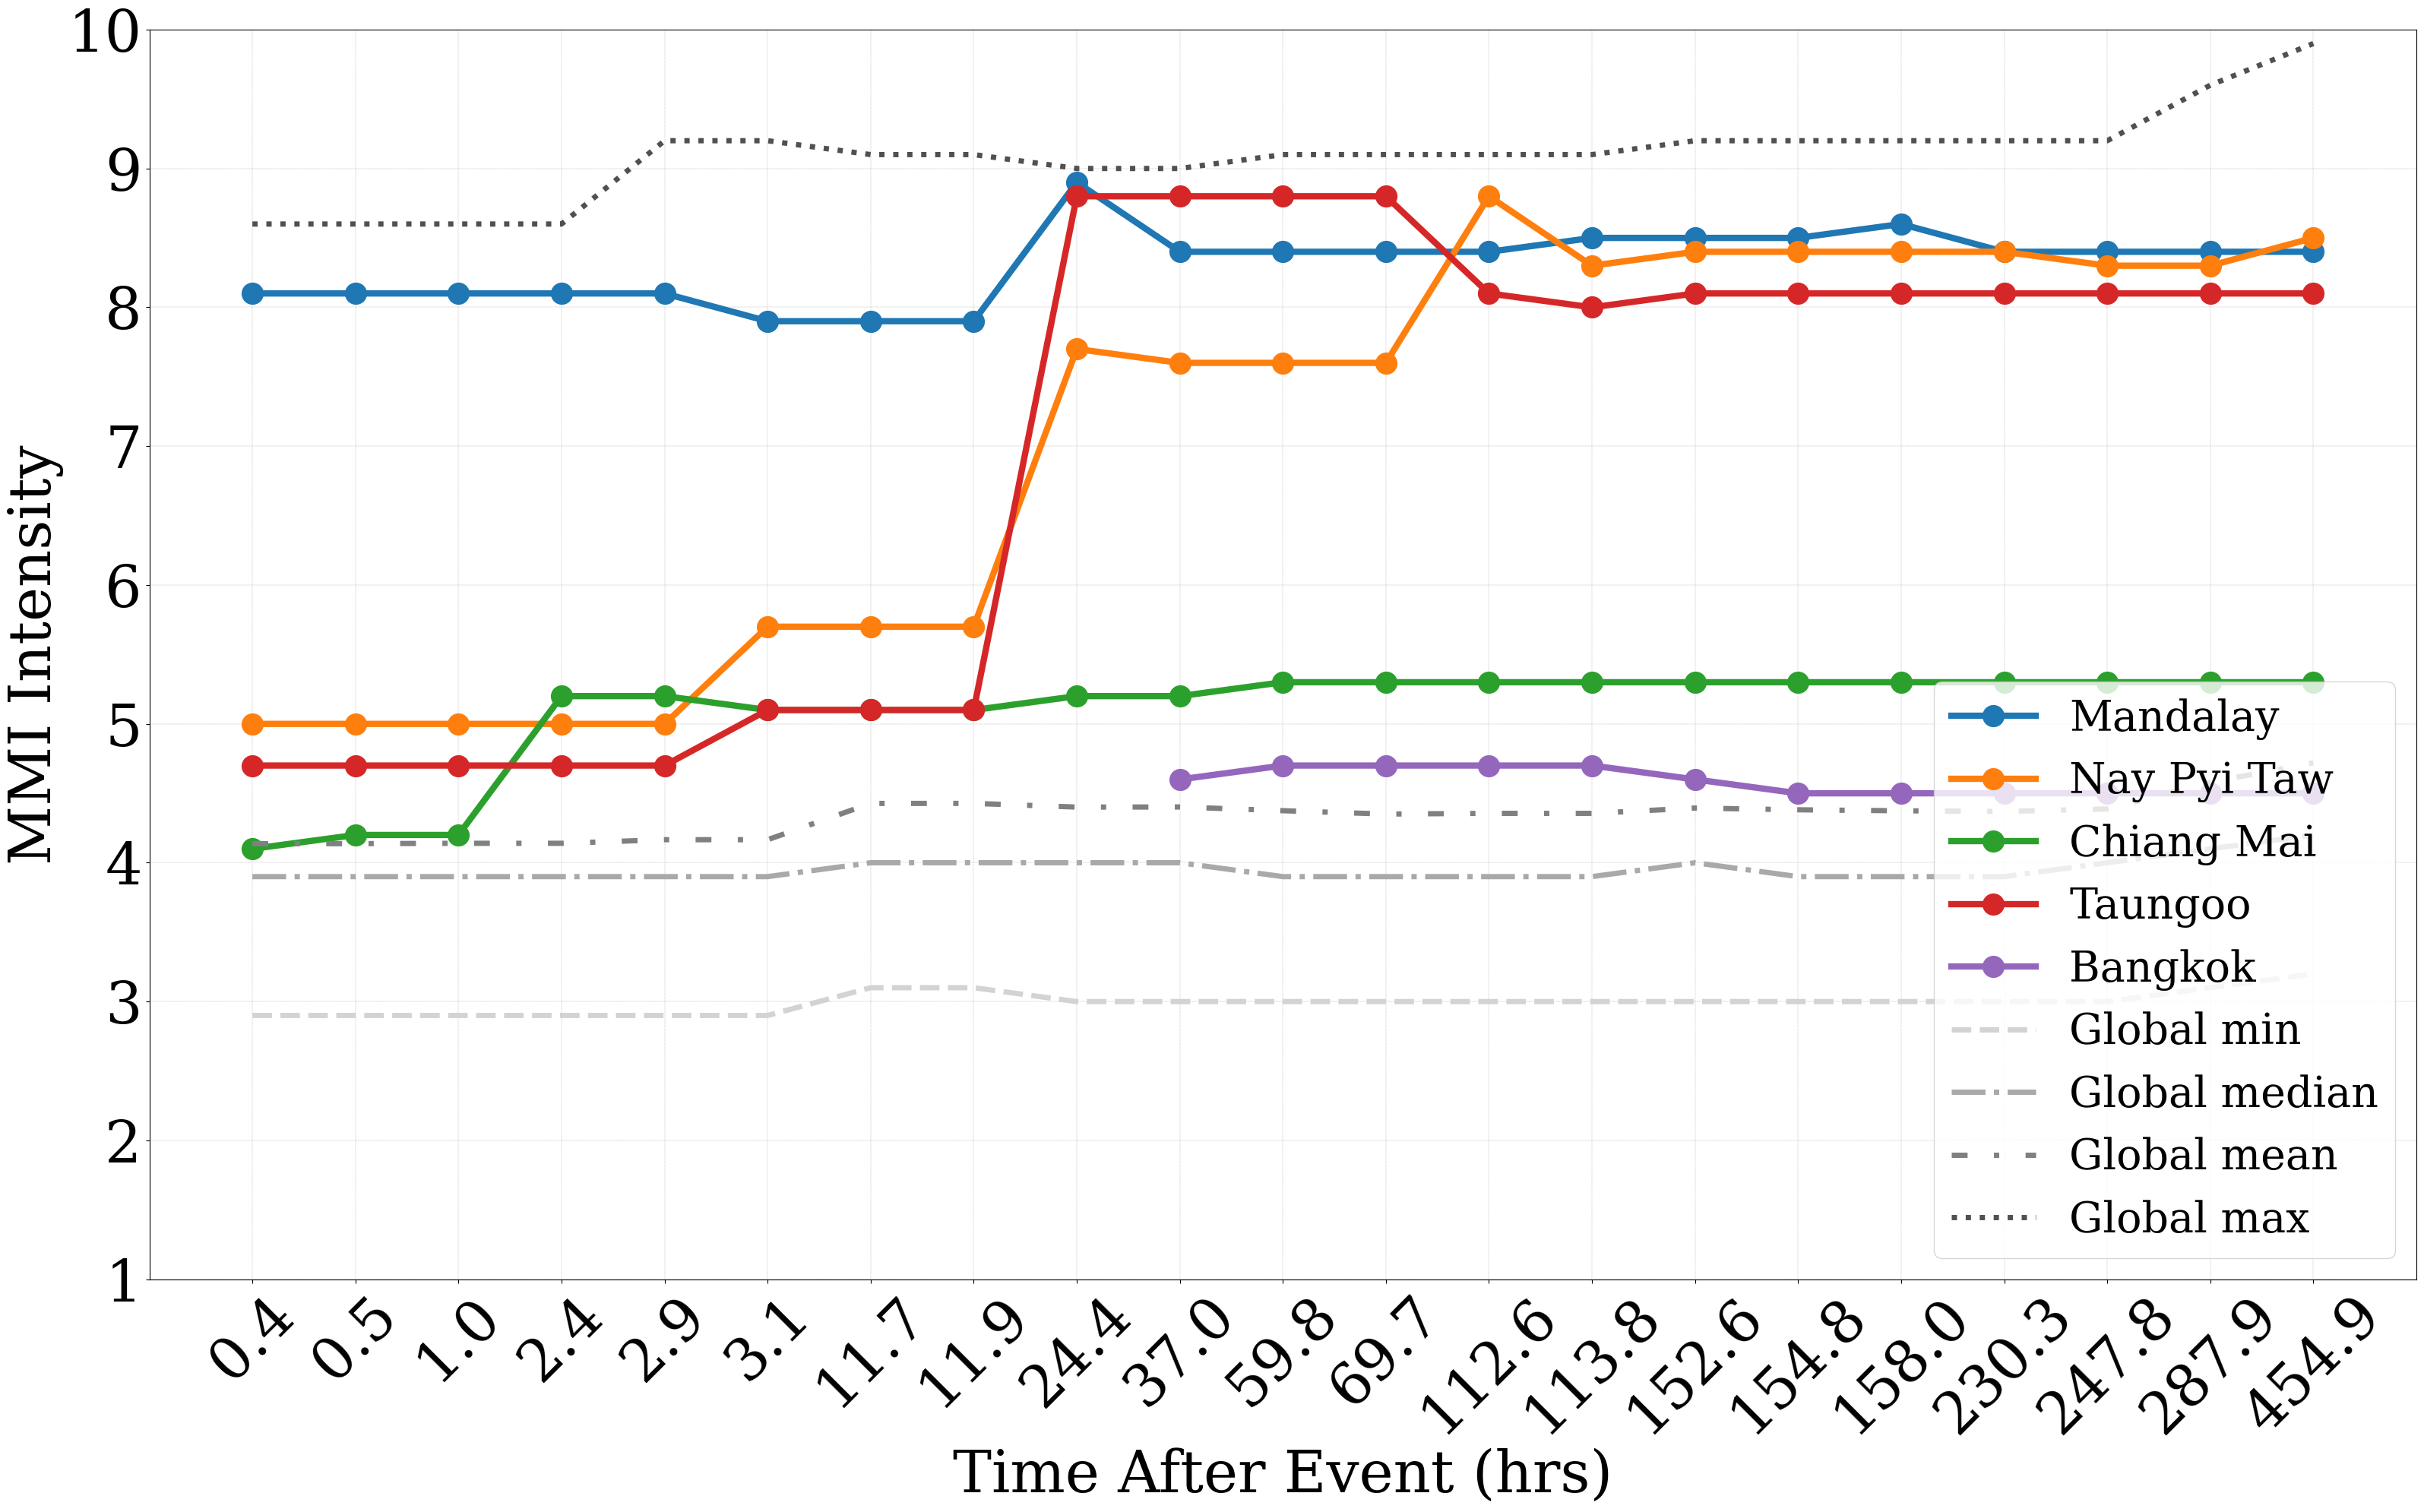

In [57]:
plt.style.use('./bins/latex_fig_style.mplstyle')


fig = shake.plot_city_and_global_progression(
    version_list=version_list,cities=selected_cities,figsize=(32,20),output_path='export',
    linewidth=5,legendloc="lower right",x_axis='TaE',y_limits=(1,10), plot_title=False)

In [58]:
%%time



if not aux_cache:
    res = shake.analyze_auxiliary_influences(
        version_list,
        rupture_folder="./event_data/SHAKEfetch/usgs-rupture-versions",
        station_folder="./event_data/SHAKEfetch/usgs-instruments_data-versions",
        dyfi_folder="./event_data/SHAKEfetch/usgs-instruments_data-versions",
        thresholds=[6.0, 7.0, 8.0,9.0],
        uncertainty_percentile=90.0,
        bootstrap_iters=200,
        radius_km=30,
        metric='mmi', use_cache=False
    )

    shake.export_auxiliary_results(res,output_dir='./export')

if aux_cache:
    res = shake.analyze_auxiliary_influences(
        version_list,
        rupture_folder="./event_data/SHAKEfetch/usgs-rupture-versions",
        station_folder="./event_data/SHAKEfetch/usgs-instruments_data-versions",
        dyfi_folder="./event_data/SHAKEfetch/usgs-instruments_data-versions",
        thresholds=[6.0, 7.0, 8.0],
        uncertainty_percentile=90.0,
        bootstrap_iters=200,
        radius_km=30,
        metric='mmi', use_cache=True
    )


INFO: [aux] trying cache at WindowsPath('export/SHAKEtime/us7000pn9s')
INFO: Imported 'aux' from WindowsPath('export/SHAKEtime/us7000pn9s/SHAKEtime_aux_aux_us7000pn9s.csv')
INFO: Imported 'diag' from WindowsPath('export/SHAKEtime/us7000pn9s/SHAKEtime_aux_diag_us7000pn9s.csv')
INFO: Imported 'merged' from WindowsPath('export/SHAKEtime/us7000pn9s/SHAKEtime_aux_merged_us7000pn9s.csv')
INFO: Imported 'correlation' from WindowsPath('export/SHAKEtime/us7000pn9s/SHAKEtime_aux_correlation_us7000pn9s.csv')
INFO: Imported 'regressions' from WindowsPath('export/SHAKEtime/us7000pn9s/SHAKEtime_aux_regressions_us7000pn9s.pkl')
INFO: [aux] loaded all tables from WindowsPath('export/SHAKEtime/us7000pn9s')


CPU times: total: 46.9 ms
Wall time: 54.9 ms


In [59]:
%%time
import matplotlib as mpl

mpl.rcParams['font.family']   = 'serif'         # or 'sans-serif', 'monospace', etc.
mpl.rcParams['font.serif']    = ['Times New Roman','Georgia']  # fallback list


if plot_overview_panels:
    plt.style.use('default')
    plt.style.use('./bins/latex_font.mplstyle')


    # 1. Tell Matplotlib to use LaTeX for all text
    #mpl.rcParams['text.usetex'] = True                                # :contentReference[oaicite:0]{index=0}
    
    # 2. Use a serif family and Computer Modern Roman (the default LaTeX font)
    #mpl.rcParams['font.family'] = 'serif'
   # mpl.rcParams['font.serif']  = ['Computer Modern Roman']          # :contentReference[oaicite:1]{index=1}


    shake.create_overview_panels(version_list,output_path='./export',rupture_folder=rupture_folder,stations_folder=stations_folder,
                                 use_cache=True,figsize=(24, 15),show_title=False,dpi=600)

CPU times: total: 0 ns
Wall time: 0 ns


In [60]:
%%time


if quantify_evolution:
    #evo_df = shake.quantify_evolution(
    #    version_list=version_list,
    #    metric="mmi",
    #    thresholds=[6,7,8,9],
    #    uncertainty_percentile=90.0,
    #    bootstrap_iters=500
    #)
    
    # 8) Plot evolution of all diagnostics across versions
    evo_df = shake.plot_evolution(
        version_list,
        metric="mmi",
        thresholds=[6,7,8,9],
        uncertainty_percentile=90.0,
        bootstrap_iters=200,
        output_path="./export")

mpl.rcParams['font.family']   = 'serif'         # or 'sans-serif', 'monospace', etc.
mpl.rcParams['font.serif']    = ['Times New Roman','Georgia']  # fallback list



CPU times: total: 0 ns
Wall time: 0 ns


In [61]:
if create_evolution_panel:
    plt.style.use('default')
    plt.style.use('./bins/latex_font.mplstyle')
    #plt.style.use('./bins/datastats_analysis.mplstyle')
    shake.create_evolution_panel(version_list, output_path='./export',figsize=(24,15), 
                                 font_sizes={'title': 25, 'labels': 25, 'ticks': 25},show_title=False)#,
                                #grid_kwargs = {'linestyle': '--', 'alpha': 0.5})

### Chaos-Informed Metrics

In [62]:
if compute_global_choas:

    plt.style.use('./bins/datastats_analysis.mplstyle')
    
    shake.plot_rolling_chaos(version_list, output_path='./export', figsize=(24,15), window_size=7, step=1,emb_dim=3, use_pca = True, show_title=False)
    shake.plot_global_chaos(version_list=version_list, output_path='./export', figsize=(24,15), show_title=False)

    #res = shake.compute_chaos_metrics(
    #metric="mmi",
    #version_list=version_list,
    #emb_dim=6, mode="spatial",
    #use_pca=True,
    #plot=True,output_path='./export',save_formats=['csv'])

    plt.style.use('default')
    plt.style.use('./bins/latex_font.mplstyle')
    
    shake.plot_spatial_chaos(version_list=version_list,output_path='./export', figsize=(24,15), show_title = False, s=200,colorbar_font=20 )


## Data Influcene

INFO: Using cached unified grid
INFO: [aux] trying cache at WindowsPath('export/SHAKEtime/us7000pn9s')
INFO: Imported 'aux' from WindowsPath('export/SHAKEtime/us7000pn9s/SHAKEtime_aux_aux_us7000pn9s.csv')
INFO: Imported 'diag' from WindowsPath('export/SHAKEtime/us7000pn9s/SHAKEtime_aux_diag_us7000pn9s.csv')
INFO: Imported 'merged' from WindowsPath('export/SHAKEtime/us7000pn9s/SHAKEtime_aux_merged_us7000pn9s.csv')
INFO: Imported 'correlation' from WindowsPath('export/SHAKEtime/us7000pn9s/SHAKEtime_aux_correlation_us7000pn9s.csv')
INFO: Imported 'regressions' from WindowsPath('export/SHAKEtime/us7000pn9s/SHAKEtime_aux_regressions_us7000pn9s.pkl')
INFO: [aux] loaded all tables from WindowsPath('export/SHAKEtime/us7000pn9s')
INFO: Saved data availability plot to export\SHAKEtime\us7000pn9s\data_influence\us7000pn9s_data_availability_timeseries.png
INFO: Saved data availability plot to export\SHAKEtime\us7000pn9s\data_influence\us7000pn9s_data_availability_timeseries.pdf
INFO: Saved data av

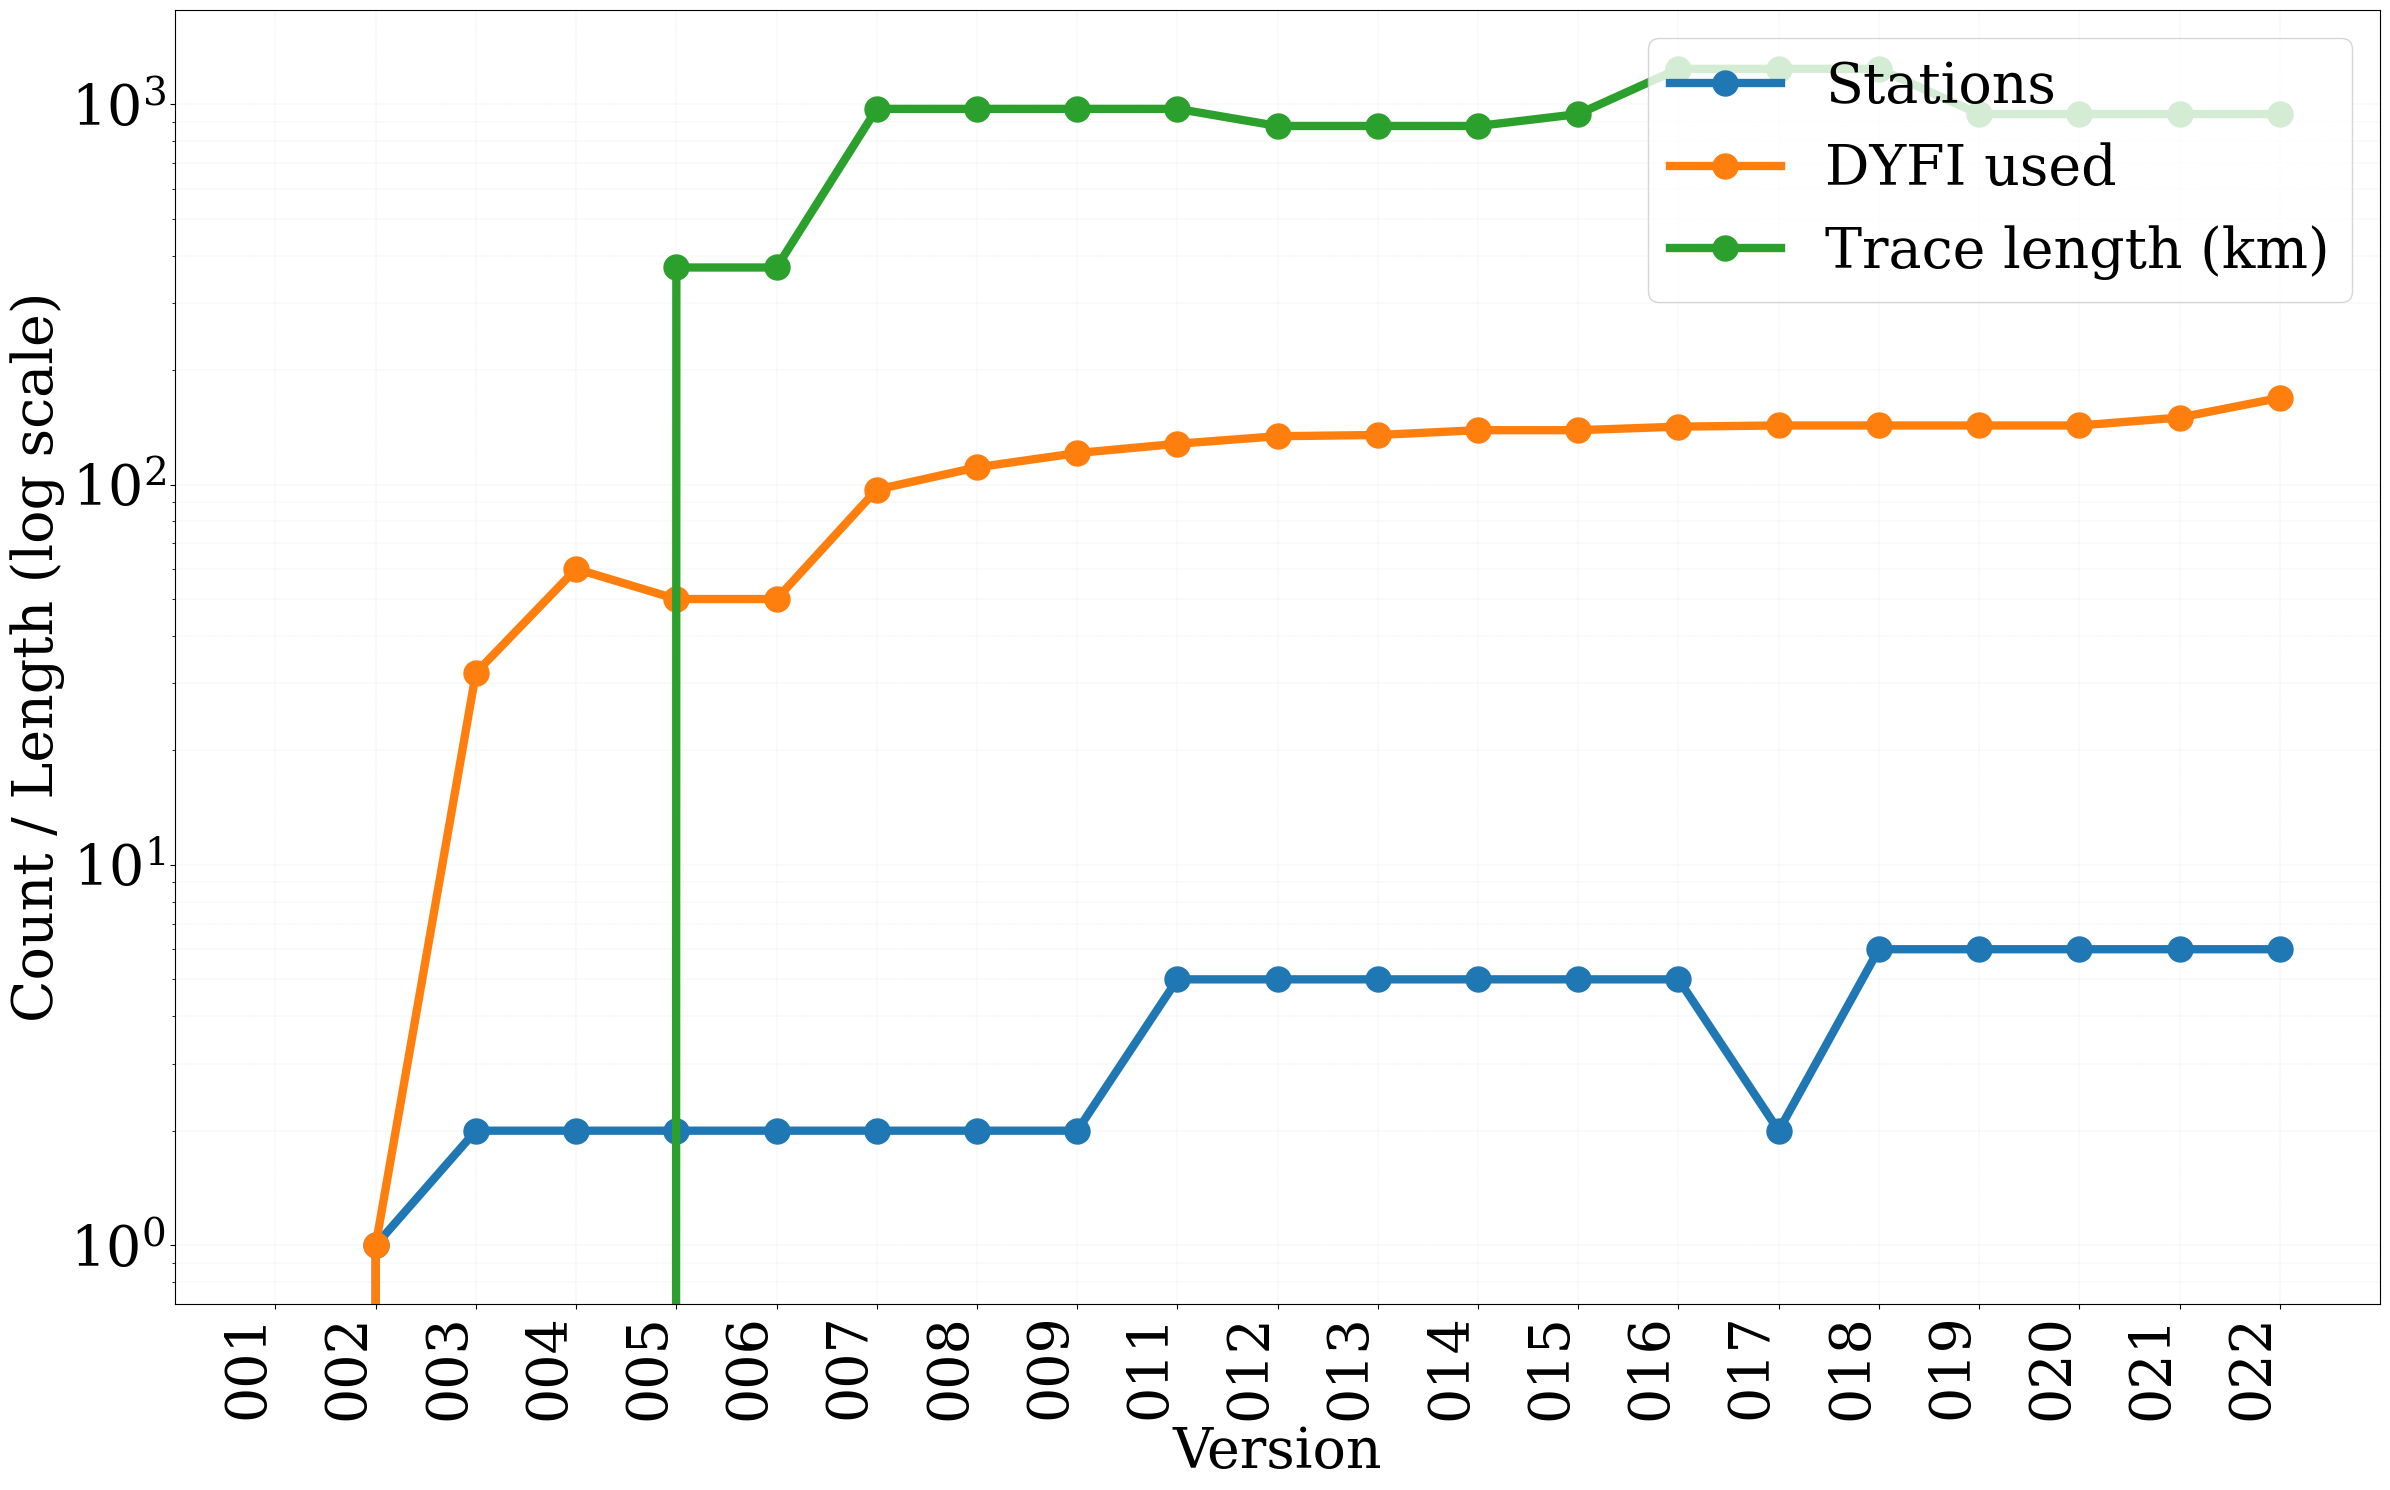

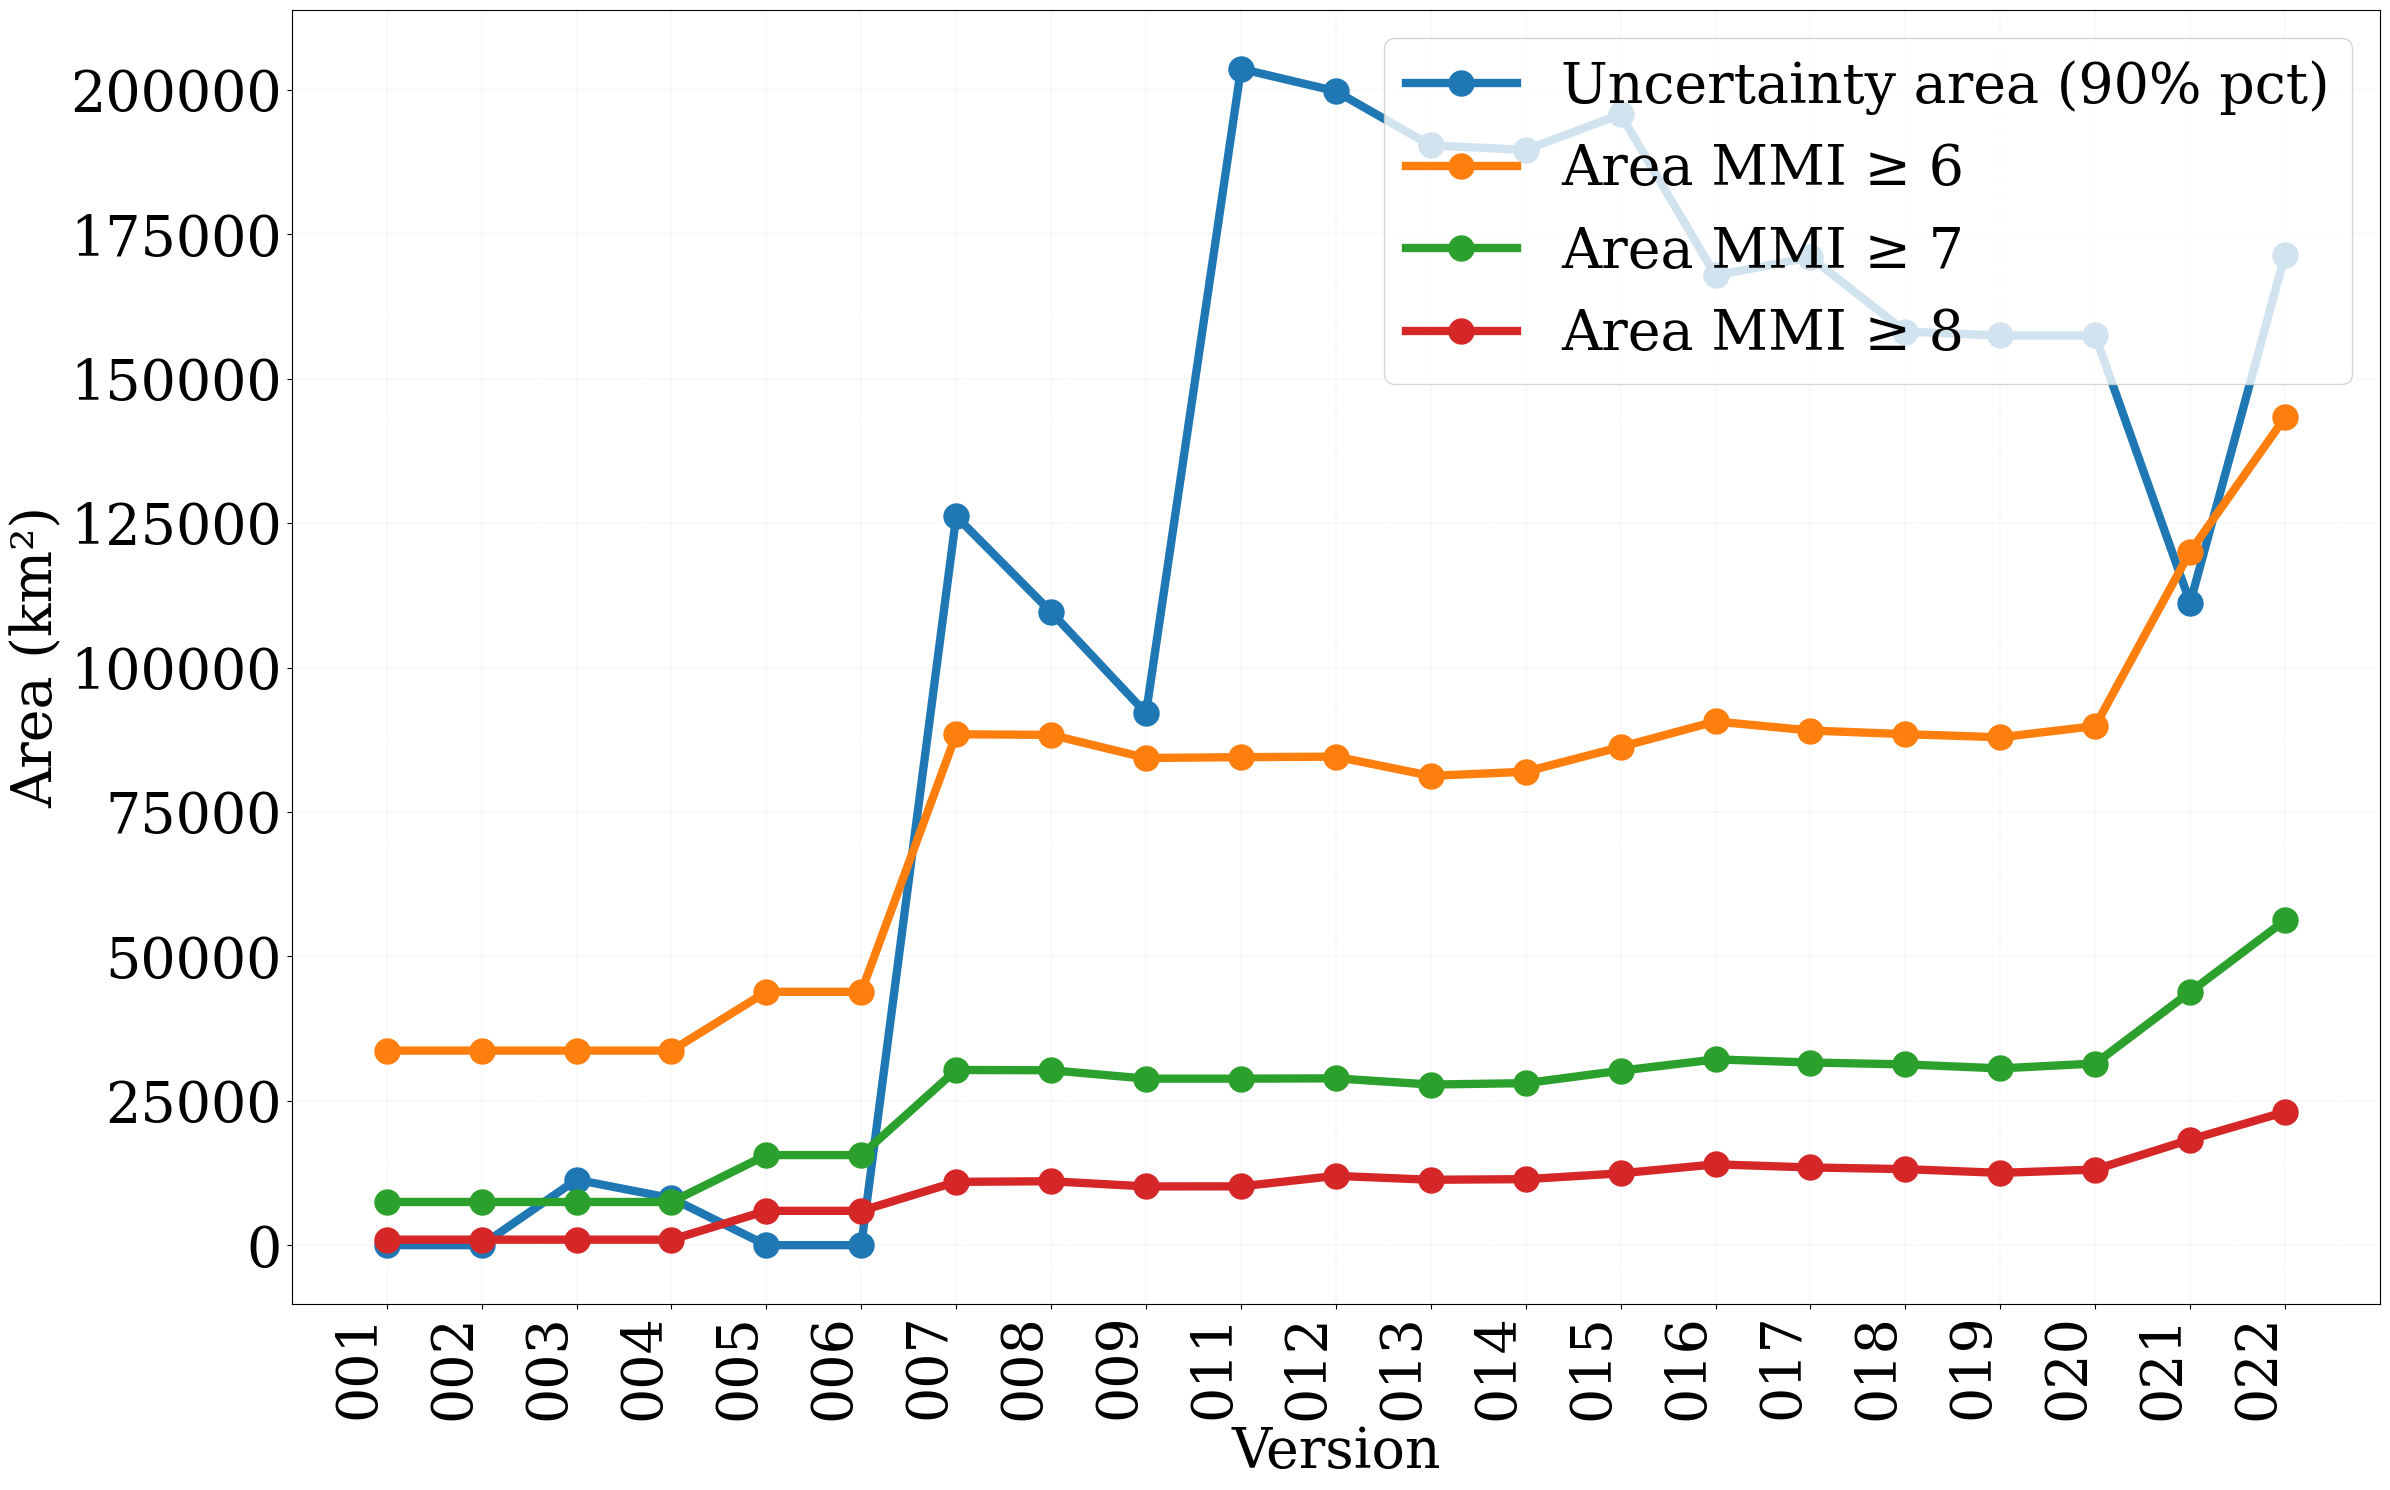

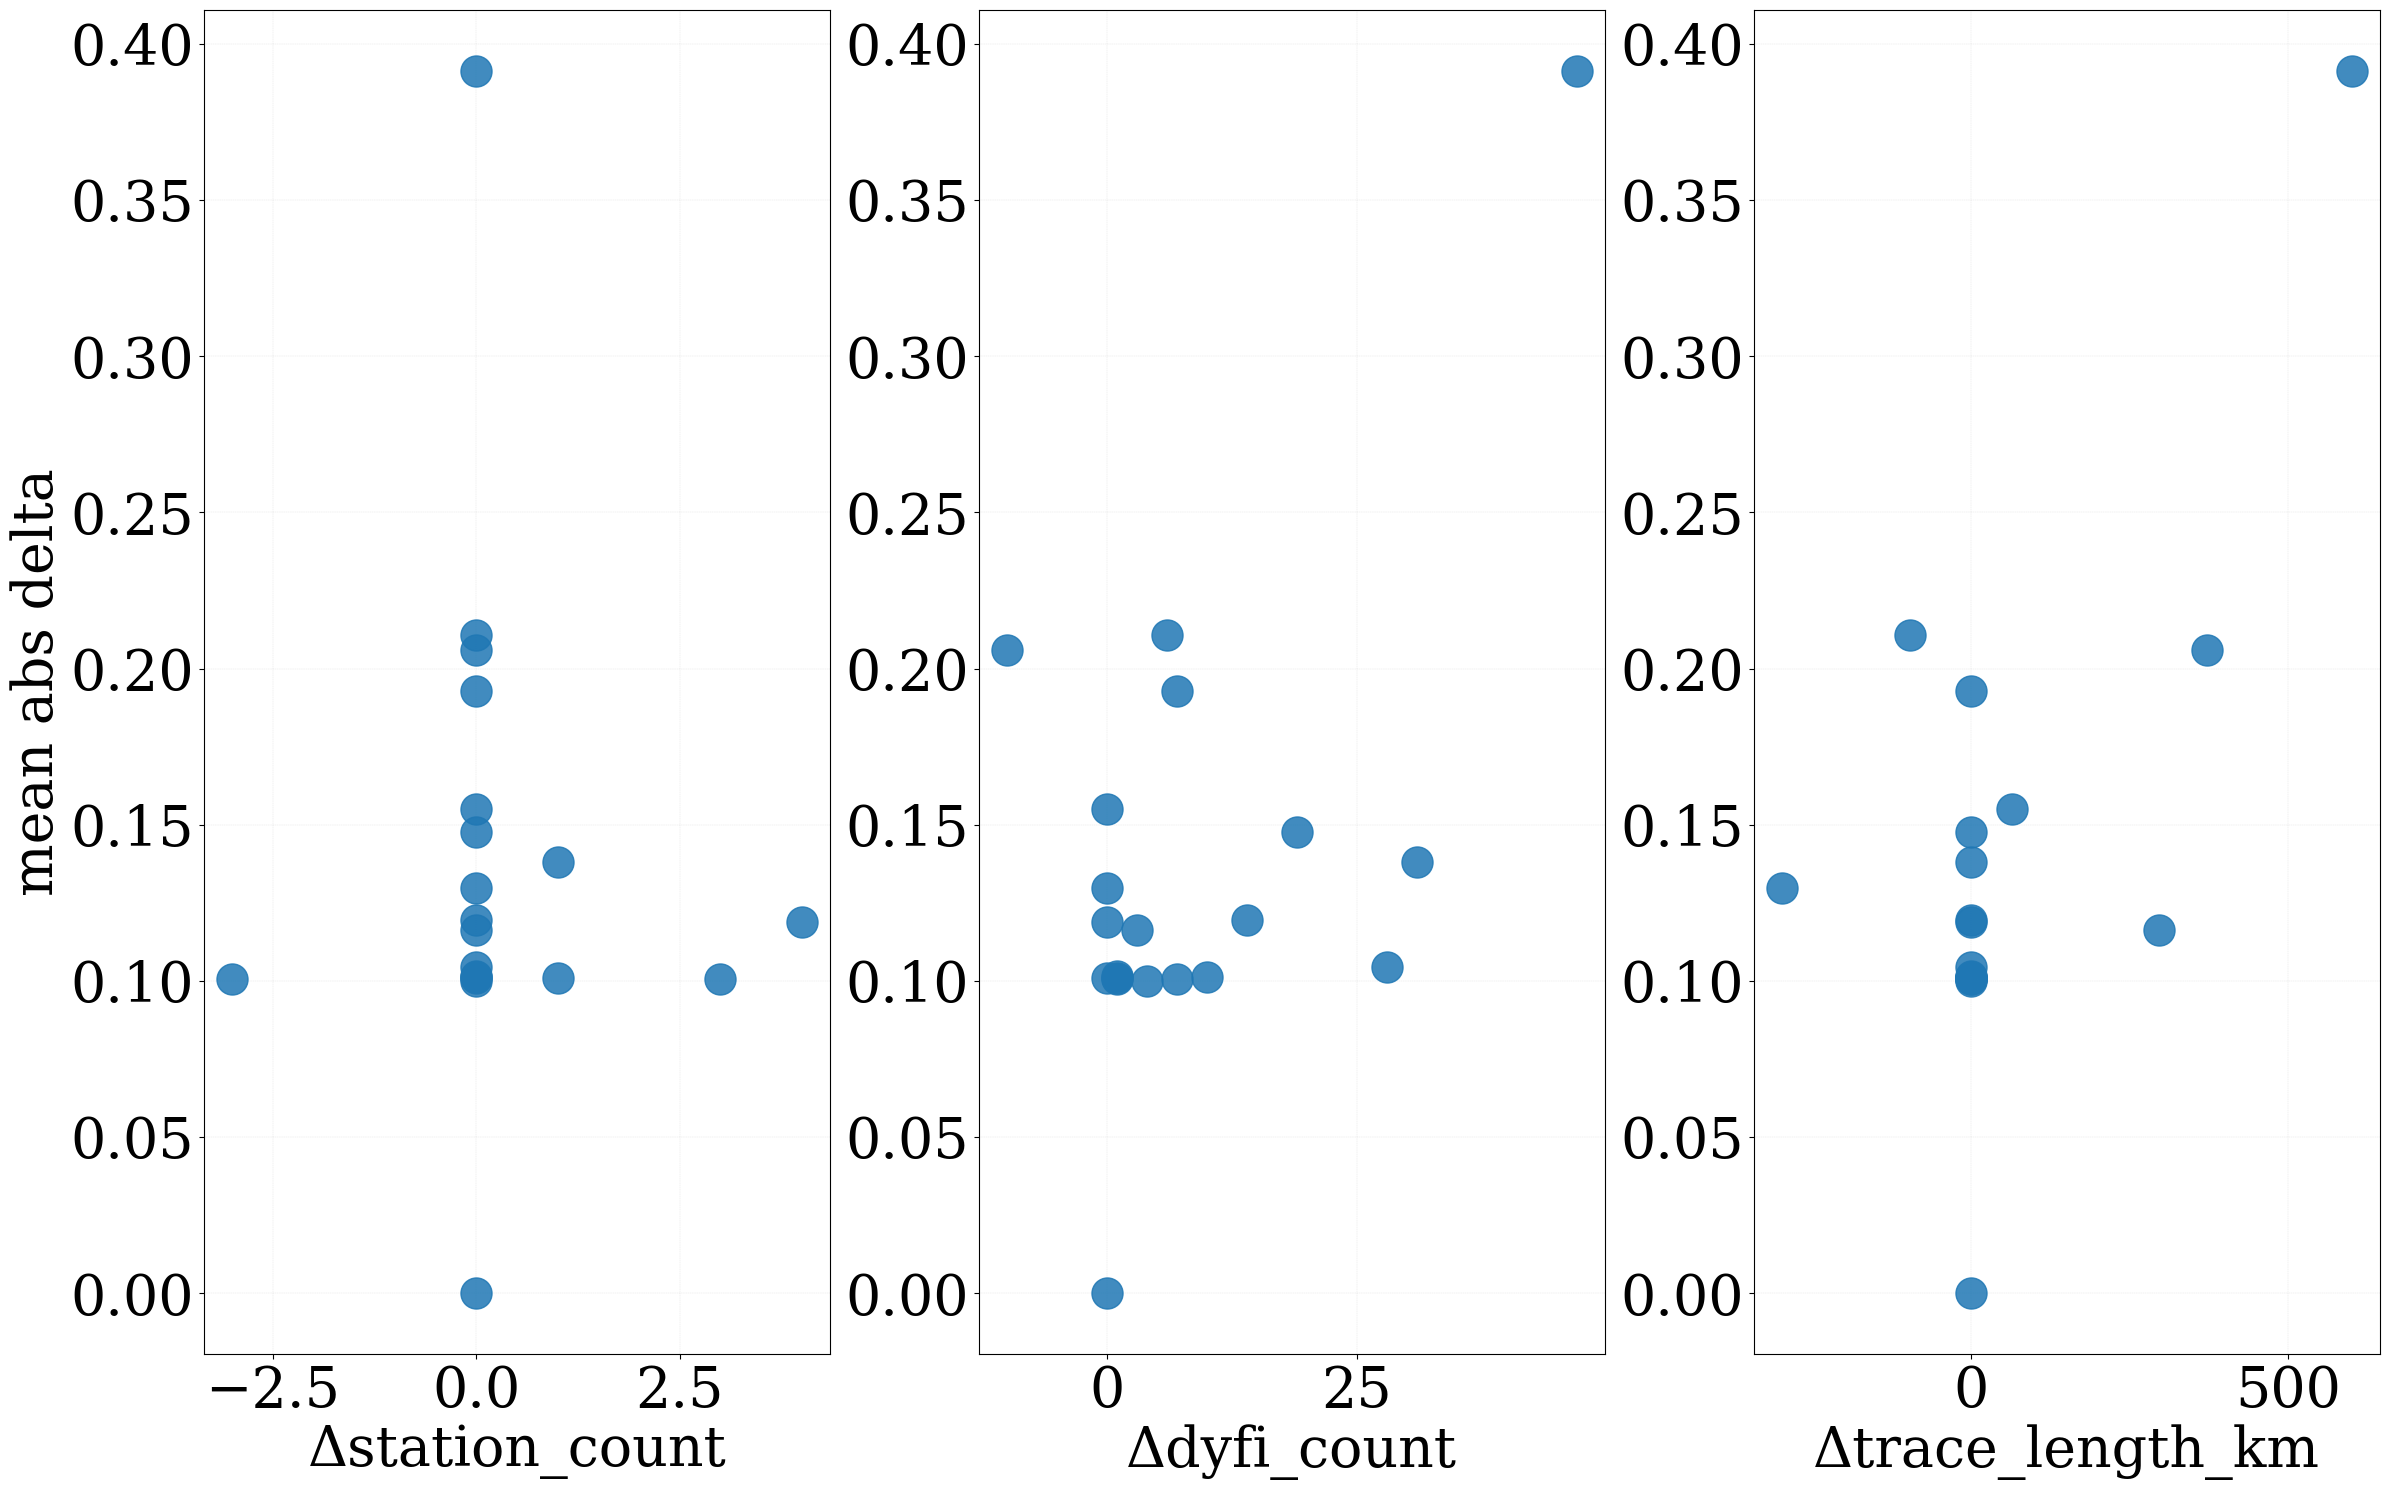

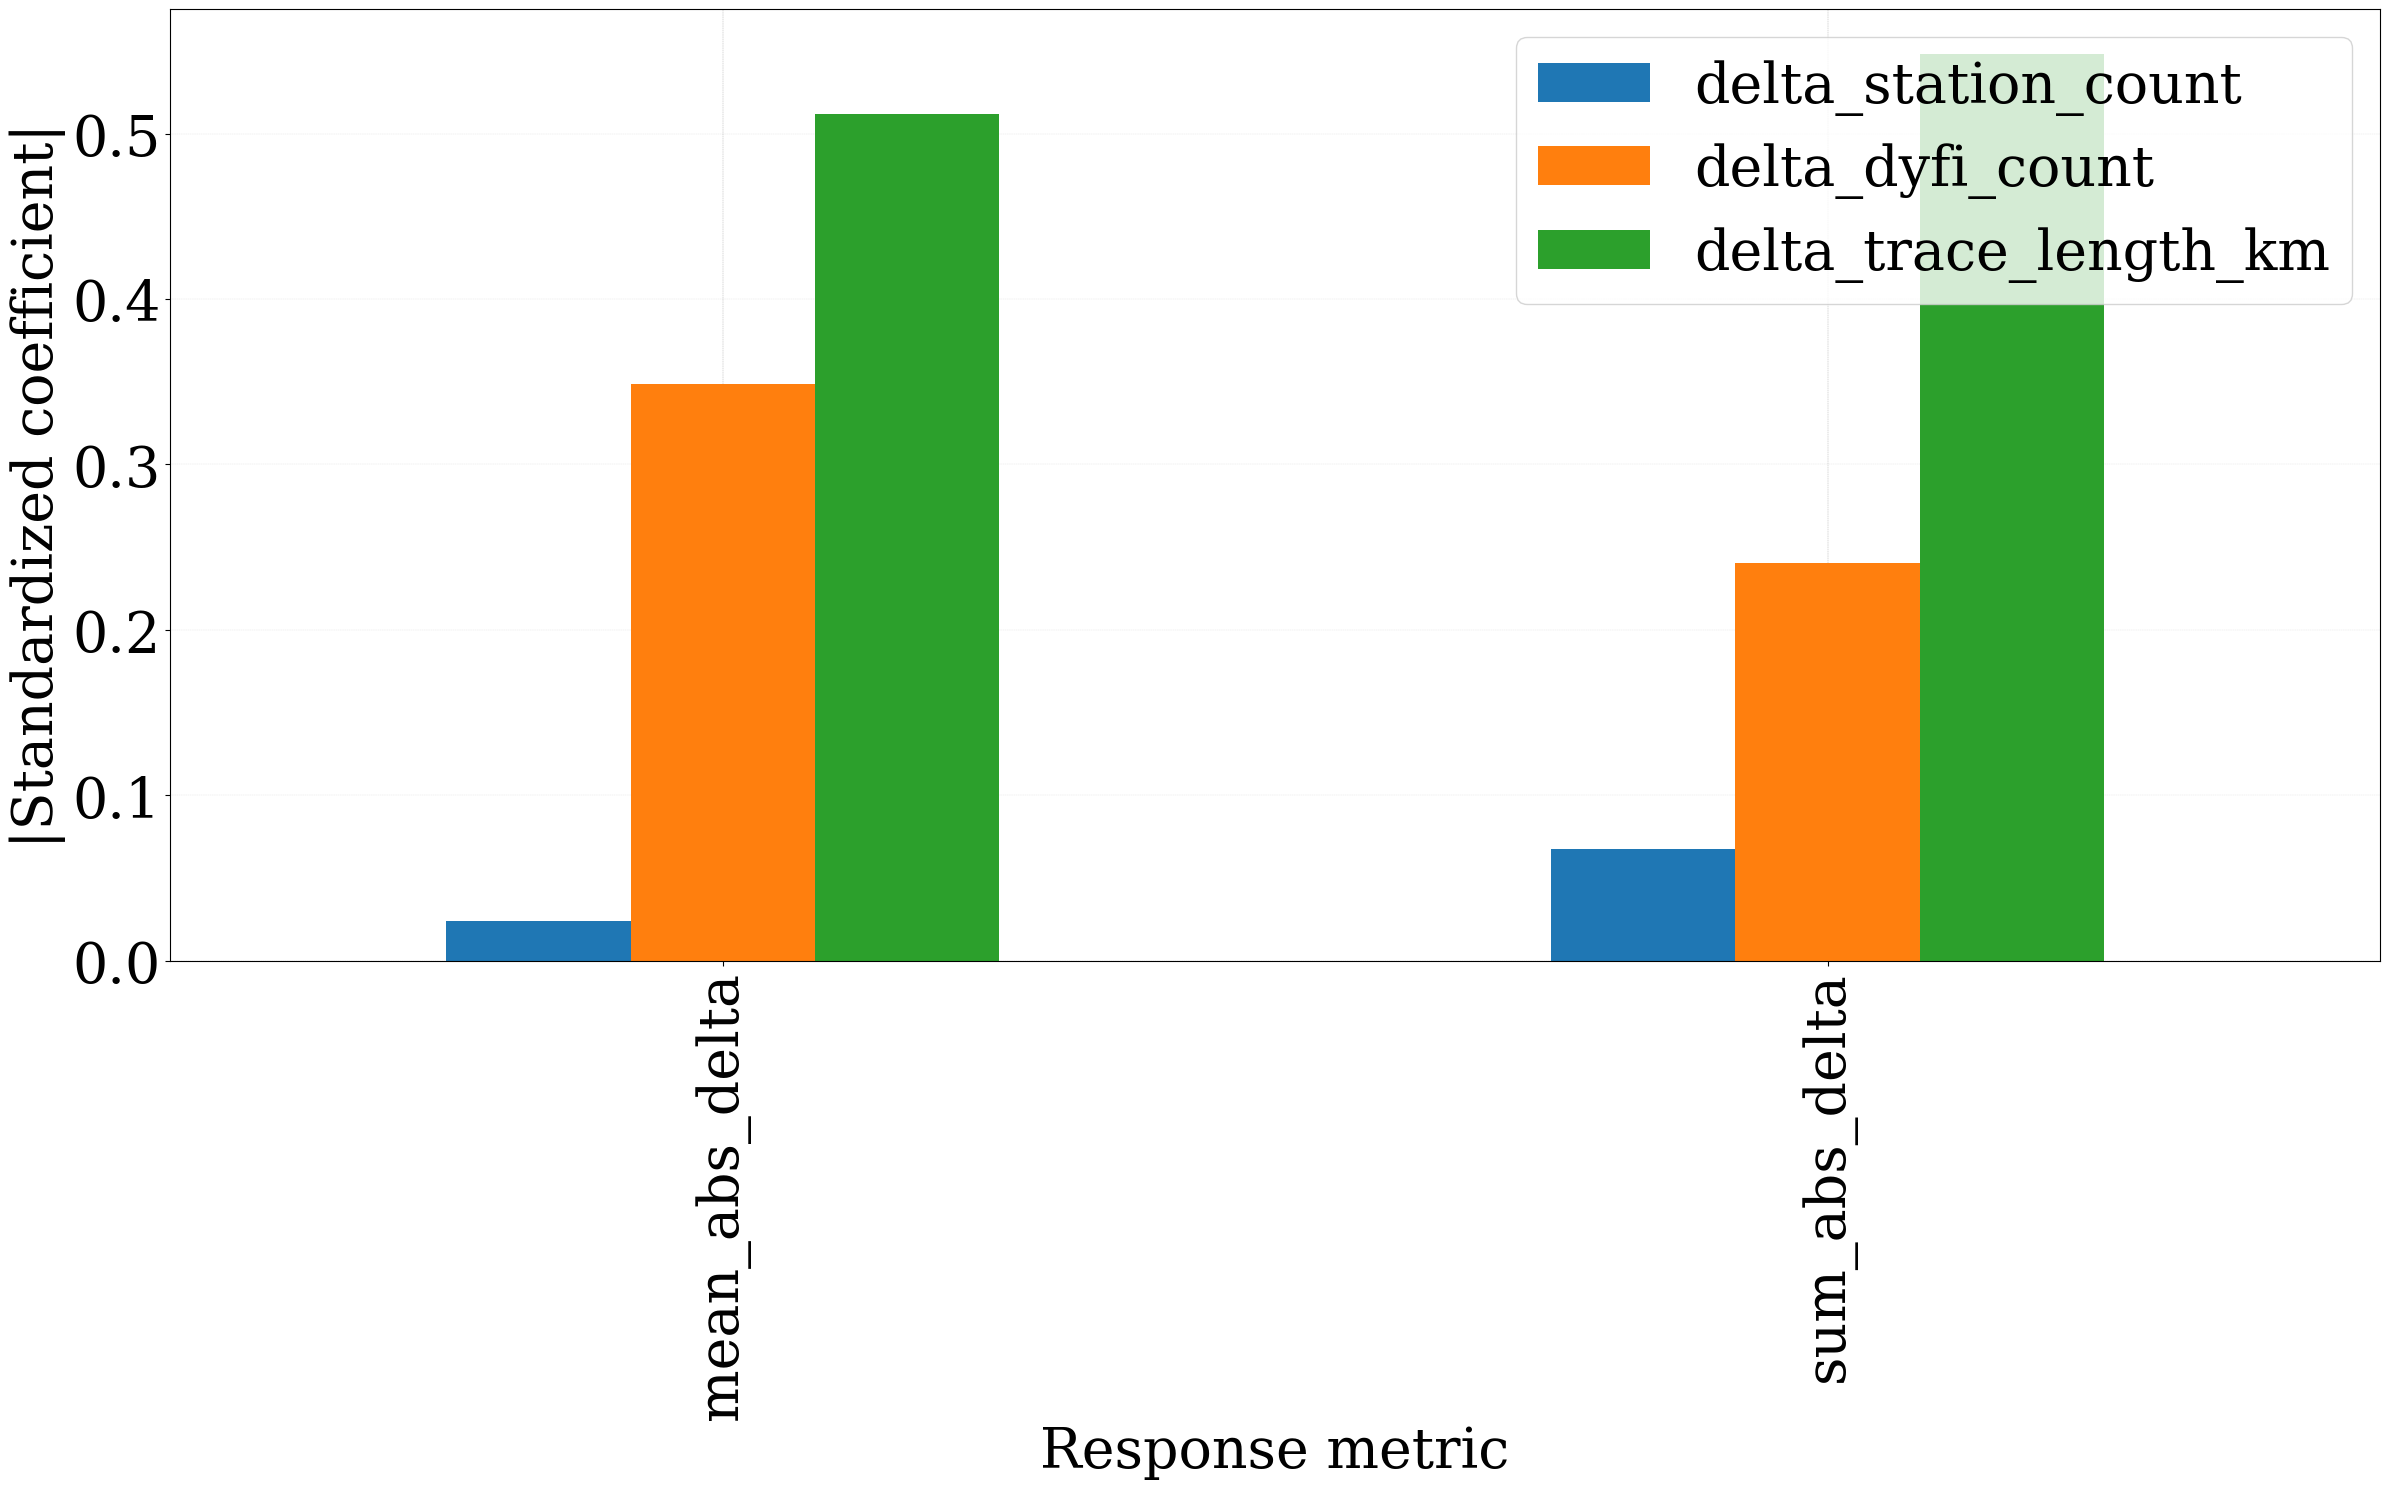

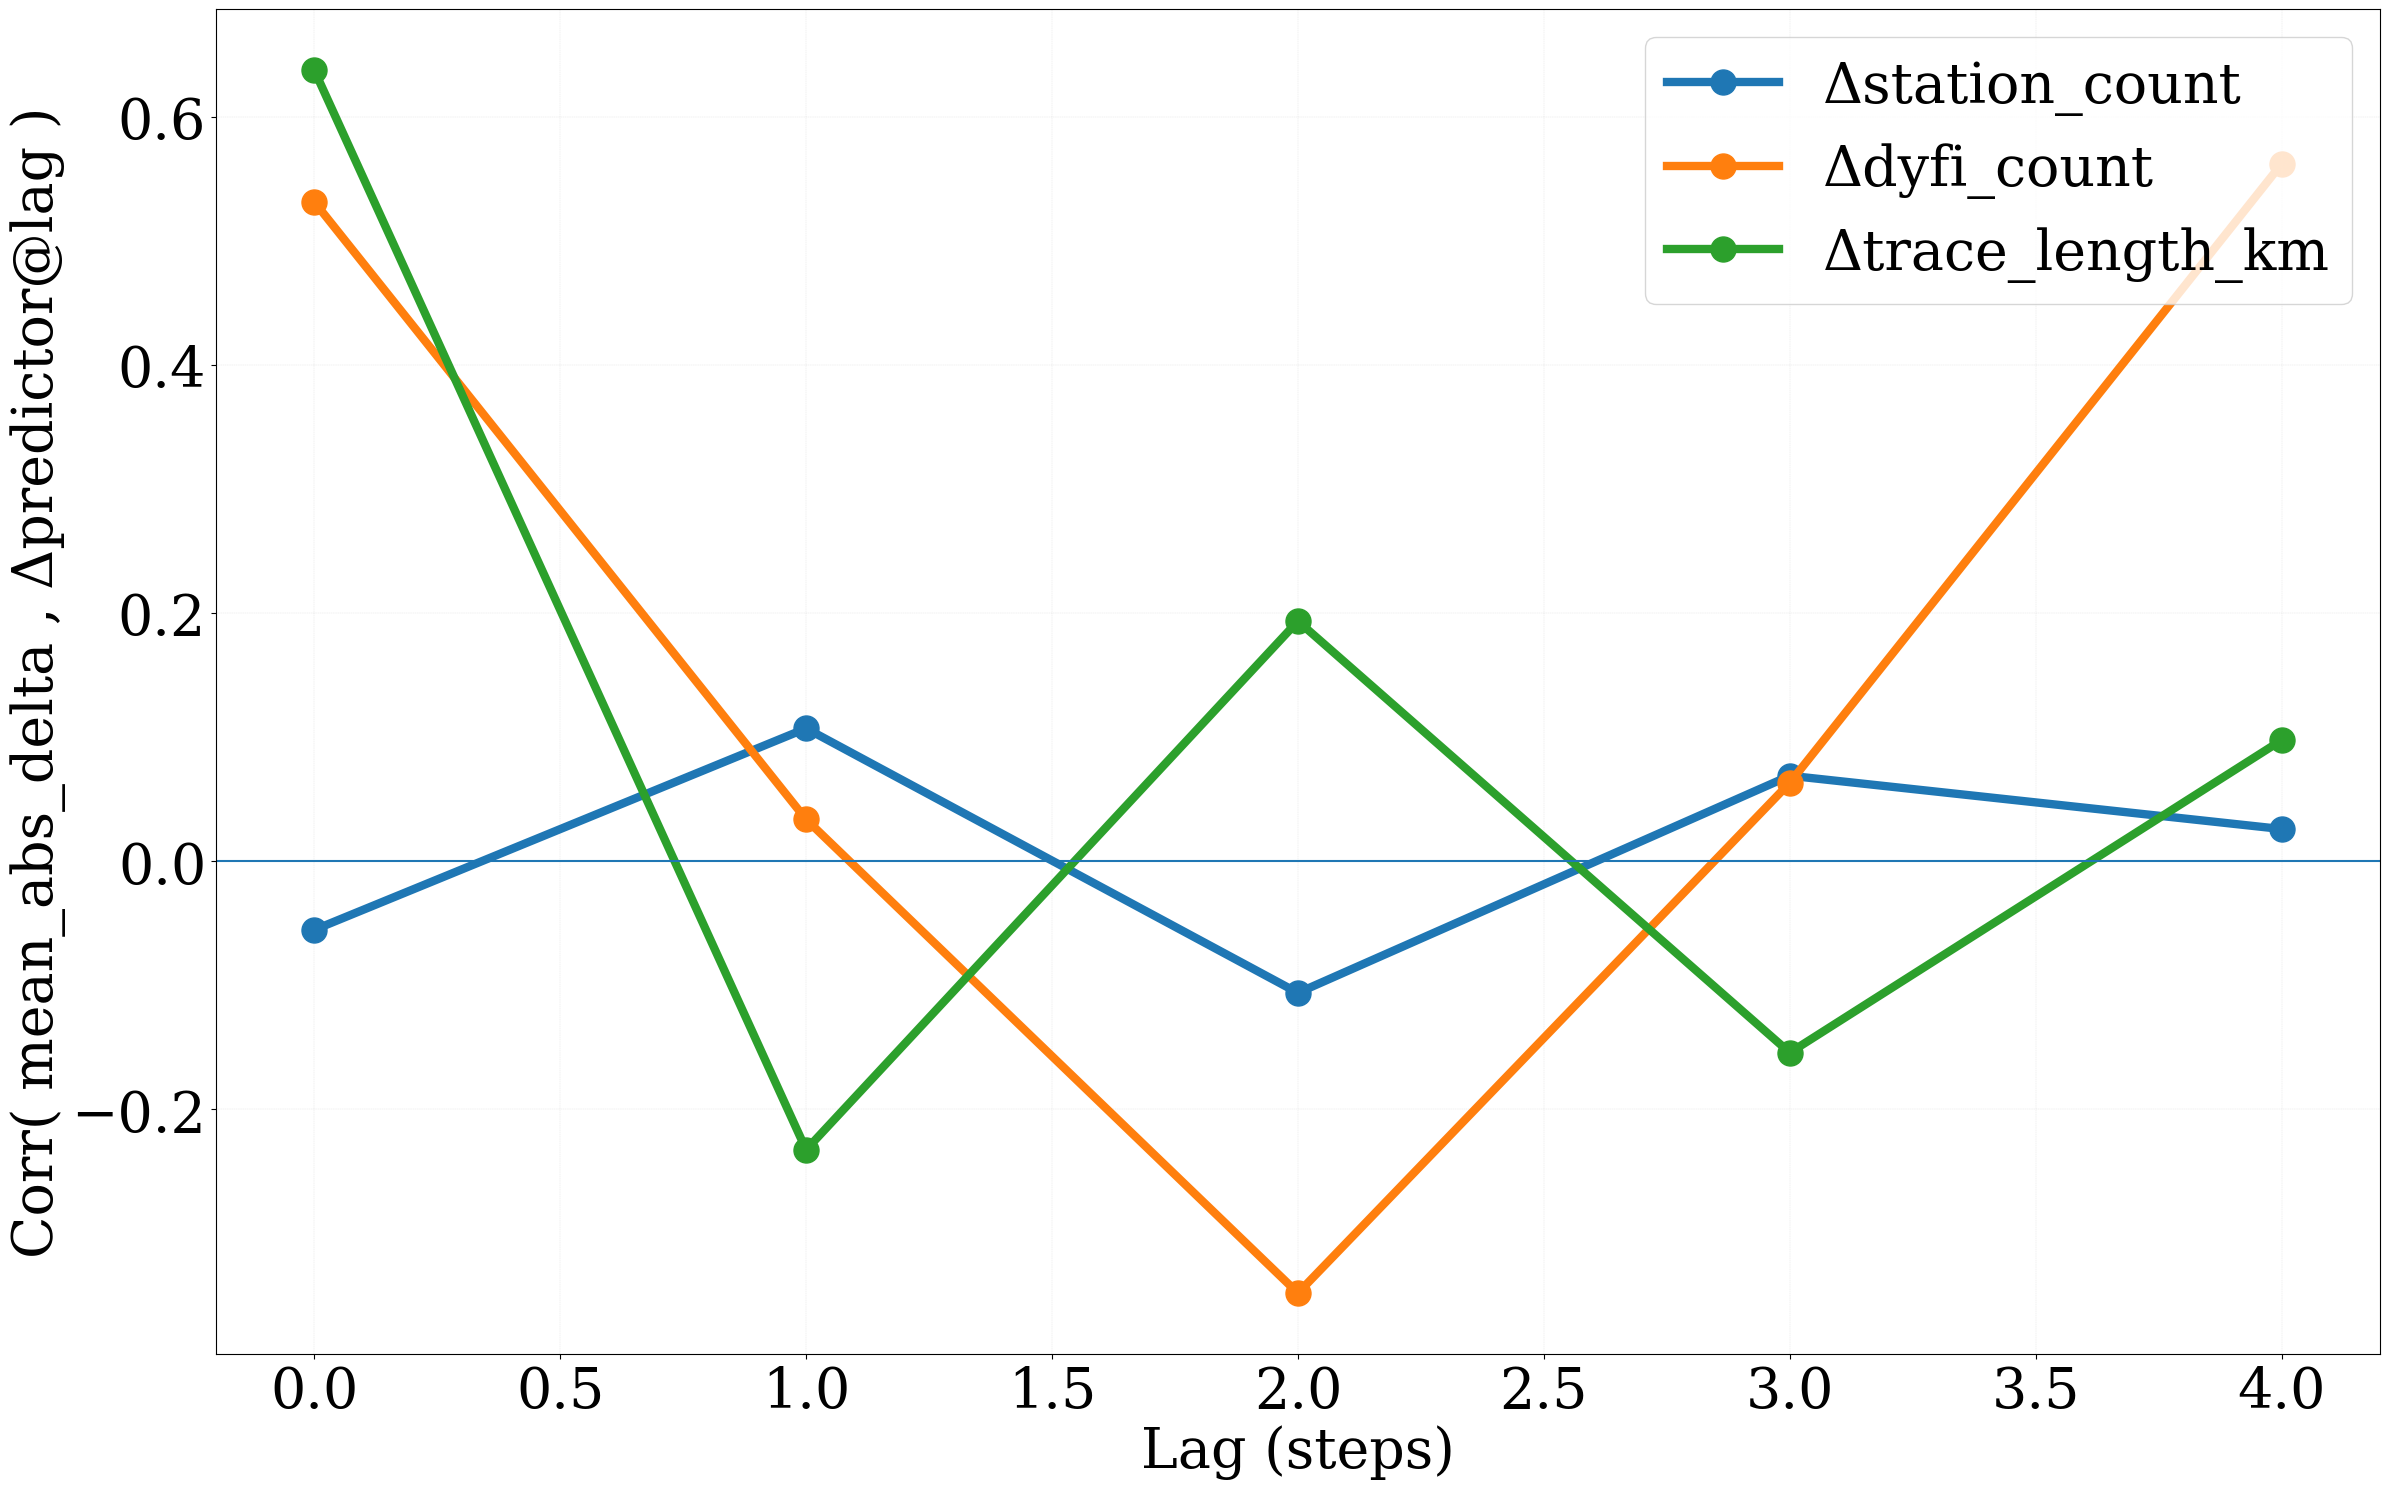

In [65]:
import matplotlib.pyplot as plt

if quantify_data_influence:

    plt.style.use('./bins/latex_font.mplstyle')

    # Ensure unified grid exists (cache)
    unified_grid = shake.get_unified_grid(version_list, use_cache=True)
    list(unified_grid)

    BIG = {"labels":40, "ticks":40, "title":40, "legend":40}

    # -------------------------
    # 1) Figure 1: Data availability (log y)
    # -------------------------
    fig1, ax1, df_data_avail = shake.plot_data_availability_timeseries(
        version_list=version_list,
        metric="mmi",
        x_ticks="version",          # or "TaE_h" / "TaE_d"
        output_path="./export",
        save_formats=["png", "pdf"],
        dpi=300,
        show_title=False,

        font_sizes=BIG,
        figsize=(24, 15),
        xrotation=90,
        legend_loc="upper right",
        grid=True,
        grid_kwargs={"linestyle":"--", "alpha":0.25},

        line_width=6,
        marker_size=18,

        close_figs=False,
    )

    # -------------------------
    # 2) Figure 2: Hazard footprint evolution
    # -------------------------
    fig2, ax2, df_hazard = shake.plot_hazard_footprint_timeseries(
        version_list=version_list,
        metric="mmi",
        x_ticks="version",
        output_path="./export",
        save_formats=["png", "pdf"],
        dpi=300,
        show_title=False,

        font_sizes=BIG,
        figsize=(24, 15),
        xrotation=90,
        legend_loc="upper right",
        grid=True,
        grid_kwargs={"linestyle":"--", "alpha":0.25},

        line_width=6,
        marker_size=18,

        close_figs=False,
    )

    # -------------------------
    # 3) Figure 3: Update magnitude vs data increments (scatter)
    # NOTE: marker_size here is scatter "s" (area), not line marker size
    # -------------------------
    fig3, axes3, df_steps = shake.plot_update_magnitude_vs_data_increment(
        version_list=version_list,
        metric="mmi",
        response="mean_abs_delta",   # or "sum_abs_delta"
        tol=1e-3,
        output_path="./export",
        save_formats=["png", "pdf"],
        dpi=300,
        show_title=False,

        font_sizes=BIG,
        figsize=(24, 15),
        grid=True,
        grid_kwargs={"linestyle":"--", "alpha":0.25},

        marker_size=500,             # scatter area
        alpha=0.85,

        close_figs=False
    )

    # -------------------------
    # 4) Figure 4: Standardized influence ranking (|beta|)
    # -------------------------
    fig4, ax4, df_betas = shake.plot_standardized_data_influence(
        version_list=version_list,
        metric="mmi",
        tol=1e-3,
        response_set=("mean_abs_delta", "sum_abs_delta"),
        output_path="./export",
        save_formats=["png", "pdf"],
        dpi=300,
        show_title=False,

        font_sizes=BIG,
        figsize=(24, 15),
        grid=True,
        grid_kwargs={"linestyle":"--", "alpha":0.25},

        close_figs=False,
    )

    # -------------------------
    # 5) Figure 5: Lag effect (correlation vs lag)
    # -------------------------
    fig5, ax5, df_lag = shake.plot_data_effect_lag(
        version_list=version_list,
        metric="mmi",
        response="mean_abs_delta",
        max_lag=4,
        tol=1e-3,
        output_path="./export",
        save_formats=["png", "pdf"],
        dpi=400,
        show_title=False,

        font_sizes=BIG,
        figsize=(24, 15),
        legend_loc="upper right",
        grid=True,
        grid_kwargs={"linestyle":"--", "alpha":0.25},

        line_width=6,
        marker_size=18,

        close_figs=False,
    )

    # Optional: inspect returned tables
    df_data_avail.head(), df_hazard.head(), df_steps, df_betas, df_lag


# END OF SCRIPT | END OF SCRIPT | END OF SCRIPT 


In [64]:
import sys
sys.exit()

SystemExit: 

C:\Users\pesha\anaconda3\envs\SHAKEenv\Lib\site-packages\IPython\core\interactiveshell.py:3675: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
%%time


if plot_auxiliary: 
    plt.style.use('./bins/latex_fig_style.mplstyle')
    shake.plot_auxiliary_results(res,figsize=(24,12),output_path='./export')

## Quantify Shakemap Evolution 

In [ ]:

if quantify_evolution:
    # 8) Plot evolution of all diagnostics across versions
    evo_df = shake.plot_evolution(
        version_list,
        metric="mmi",
    thresholds=[6,7,8,9],    uncertainty_percentile=90.0,
        bootstrap_iters=200,
        output_path="./export")

### Compute SHAKEmaps Auxiliary Influences

In [ ]:
from modules.SHAKEtime import *
from pathlib import Path

plt.style.use('default')

shake = SHAKEtime(event_id, event_time, shakemap_folder, pager_folder, file_type=2)
csv_pathh = f"./export/SHAKEtime/{event_id}/SHAKEtime-Summary-{event_id}.csv"
shake.import_summary(csv_pathh)

dataframe = shake.get_dataframe()


#shake = SHAKEtime(event_id, event_time, shakemap_folder, pager_folder, file_type=2)
csv_pathh = f"./export/SHAKEtime/{event_id}/SHAKEtime_unified_grid_{event_id}_mmi.pickle"
shake.import_unified_grid(csv_pathh)
#shake.get_unified_grid (use_cache = True)

In [ ]:
if not cache_created:
    res = shake.analyze_auxiliary_influences(
        version_list,
        rupture_folder="./event_data/SHAKEfetch/usgs-rupture-versions",
        station_folder="./event_data/SHAKEfetch/usgs-instruments_data-versions",
        dyfi_folder="./event_data/SHAKEfetch/usgs-instruments_data-versions",
        thresholds=[6.0, 7.0, 8.0,9.0],
        uncertainty_percentile=90.0,
        bootstrap_iters=200,
        radius_km=30,
        metric='mmi', use_cache=False
    )

    shake.export_auxiliary_results(res,output_dir='./export')

if cache_created:
    res = shake.analyze_auxiliary_influences(
        version_list,
        rupture_folder="./event_data/SHAKEfetch/usgs-rupture-versions",
        station_folder="./event_data/SHAKEfetch/usgs-instruments_data-versions",
        dyfi_folder="./event_data/SHAKEfetch/usgs-instruments_data-versions",
        thresholds=[6.0, 7.0, 8.0],
        uncertainty_percentile=90.0,
        bootstrap_iters=200,
        radius_km=30,
        metric='mmi', use_cache=True
    )


In [ ]:
if plot_auxiliary: 
    plt.style.use('./bins/latex_fig_style.mplstyle')
    shake.plot_auxiliary_results(res,figsize=(24,12),output_path='./export')

### Plot overiew Panel 

In [ ]:
if plot_overview_panels:
    plt.style.use('default')
    shake.create_overview_panels(version_list,output_path='./export',rupture_folder=rupture_folder,stations_folder=stations_folder,
                                 use_cache=True,dpi=100,figsize=(24,16))

In [ ]:
quantify_evolution = True 


if quantify_evolution:
    
    #evo_df = shake.quantify_evolution(
    #    version_list=version_list,
    #    metric="mmi",
    #    thresholds=[6,7,8,9],
    #    uncertainty_percentile=90.0,
    #    bootstrap_iters=500
    #)
    
    # 8) Plot evolution of all diagnostics across versions
    evo_df = shake.plot_evolution(
        version_list,
        metric="mmi",
        thresholds=[6,7,8,9],
        uncertainty_percentile=90.0,
        bootstrap_iters=200,
        output_path="./export")

In [ ]:
import sys 
sys.exit()

# SHAKEconsequence

In [ ]:
from modules.SHAKEtime import *


In [ ]:
registry = [
    {"event_id": "us7000pn9s",  "event_type": "main_event",  "file_path": "./export-shakefetch/SHAKEfetch/usgs-shakemap-versions/us7000pn9s/us7000pn9s_us_1_grid.xml"},
    {"event_id": "us6000q5ps", "event_type": "aftershock",  "file_path": "./export-shakefetch/SHAKEfetch/usgs-shakemap-versions/us6000q5ps/us6000q5ps_us_1_grid.xml"},
    {"event_id": "us7000pn9z", "event_type": "aftershock",  "file_path": "./export-shakefetch/SHAKEfetch/usgs-shakemap-versions/us7000pn9z/us7000pn9z_us_1_grid.xml"},
]

registry = [
    {
        "event_id": "us7000pn9s",
        "event_type": "main_event",
        "file_path": "./export-shakefetch/SHAKEfetch/usgs-shakemap-versions/us7000pn9s/us7000pn9s_us_1_grid.xml",
        "std_file_path": "./export-shakefetch/SHAKEfetch/usgs-shakemap-versions/us7000pn9s/us7000pn9s_us_1_uncertainty.xml"
    },
    {
        "event_id": "us6000q5ps",
        "event_type": "aftershock",
        "file_path": "./export-shakefetch/SHAKEfetch/usgs-shakemap-versions/us6000q5ps/us6000q5ps_us_1_grid.xml",
        "std_file_path": "./export-shakefetch/SHAKEfetch/usgs-shakemap-versions/us6000q5ps/us6000q5ps_us_1_uncertainty.xml"
    },
    {
        "event_id": "us7000pn9z",
        "event_type": "aftershock",
        "file_path": "./export-shakefetch/SHAKEfetch/usgs-shakemap-versions/us7000pn9z/us7000pn9z_us_1_grid.xml",
        "std_file_path": "./export-shakefetch/SHAKEfetch/usgs-shakemap-versions/us7000pn9z/us7000pn9z_us_1_uncertainty.xml"
    }
]



In [ ]:
#Turkey Earthqauke 
event_ids = [
    "us6000jllz","us6000jlqa","us6000jlm1","us6000jlm9","us6000jlmh","us6000jlqe",
    "us6000jlql","us6000jlrc","us6000jm1y","us6000jm5e","us6000jmgf","us6000jqcn"]

#Turkey Earthqauke 
event_ids = [
    "us6000jllz","us6000jlqa","us6000jlm1","us6000jqcn","us6000jlrc","us6000jm1y","us6000jlqe","us6000jlql","us6000jlnn","us6000jlm9","us6000jqjc",
    "us6000jm5e","us6000jmgf","us6000jm6p","us6000jlsu","us6000jnt0","us6000jmat","us6000jm7f","us6000jm2r","us6000jls3","us6000jlmn","us6000jlmh",
    "us6000jrw4","us6000jriw","us6000jpff","us6000jm1p","us6000jmh3","us6000jlqr","us6000jlmf","us7000jgyv","us6000jpyq","us6000jngk","us6000jmg1",
    "us6000jm96","us6000jlta","us6000jls6","us6000jlrv","us6000jlnf","us6000jmn0"]




registry = []  # start with an empty list
for idx, event in enumerate(event_ids):  # get both index and event ID :contentReference[oaicite:0]{index=0}
    # use a conditional expression to pick the event type
    event_type = "main_event" if idx == 0 else "aftershock"
    
    # build the entry dict and append it
    registry.append({
        "event_id":     event,
        "event_type":   event_type,
        "file_path":    f"./export-shakefetch-turkey/SHAKEfetch/usgs-shakemap-versions/{event}/{event}_us_1_grid.xml",
        "std_file_path":f"./export-shakefetch-turkey/SHAKEfetch/usgs-shakemap-versions/{event}/{event}_us_1_uncertainty.xml"
    })


In [ ]:
registry

In [ ]:
sc = SHAKEcumulative()

#meta_df = sc.build_metadata_table(registry)


#meta_df

In [ ]:
#sc.ingest_event_shakemaps( soil_consideration=False,
        soil_method=None,
        gmice_model='WordenEtAl12'registry, metric='mmi')
        soil_consideration=False,


In [ ]:
sc.combine_event_shakemaps(registry, metric='mmi', write_std_to_df=True,interp_method='nearest', use_cache=False)


In [ ]:
sc.get_combined_data()

In [ ]:
sc.get_bayesian_shakemap(column_prefix="mmi", mode="model_default")

sc.get_bayesian_shakemap(column_prefix="mmi", mode="main_only")

In [ ]:
sc.get_combined_data()

In [ ]:
sc.get_mean_shakemap()
sc.get_max_shakemap()

In [ ]:
sc.get_rms_shakemap()

In [ ]:
weights = {
    "us7000pn9s": 0.5,  # main event gets full weight
    "us6000q5ps": 0.2,  # aftershock 1 is slightly less important
    "us7000pn9z": 0.3   # aftershock 2 is even less important
}


# By magnitude only
sc.get_weighted_mean_shakemap(use_magnitude=True)

# By time-decay only
sc.get_weighted_mean_shakemap(use_time_decay=True)

# Custom weights + magnitude
sc.get_weighted_mean_shakemap(weights)


sc.get_weighted_mean_shakemap(use_distance=True)


In [ ]:
sc.get_quantile_shakemap()

In [ ]:
sc.get_probability_of_exceedance(5)

In [ ]:
sc.get_exceedance_count(7)

In [ ]:
data = sc.get_combined_data()

data


In [ ]:
sc.available_plots()

In [ ]:
column = 'cumulative_mbayesian'


mapper = SHAKEmapper()
fig,ax = mapper.create_basemap()

mapper.add_shakemap(data['lon'],data['lat'],data[column],imt_type='mmi')

#print(mapper.get_extent())

#mapper.update_extent([max(data['lon']), min(103.4, 13.0, 26.8])



In [ ]:
sc.get_data_extent('cumulative_mbayesian')

In [ ]:
extent = sc.get_data_extent('cumulative_mbayesian')


extend = [extent['lon_min'], extent['lon_max'],extent['lat_min'],extent['lat_max']]

extend

In [ ]:
column = 'cumulative_q75'


columns = [
 'cumulative_modelbayesian',
 'cumulative_mbayesian',
 'cumulative_mean',
 'cumulative_max',
 'cumulative_rms',
 'cumulative_mweighted_mean',
 'cumulative_tweighted_mean',
 'cumulative_weighted_mean',
 'cumulative_dweighted_mean',
 'cumulative_q75',
 'poe_5.0',
 'exceedance_count_7.0']


for column in columns:

    mapper = SHAKEmapper()
    fig,ax = mapper.create_basemap()
    
    #mapper.update_extent([35.9583, 37.325, 36.4167, 37.25)
    
    
    scatter = ax.scatter(
        data['lon'],data['lat'],
        c=data[column],
        cmap='viridis',
        transform=ccrs.PlateCarree(),
        zorder=8
    )
    
    # add a vertical colorbar to the right of the Axes
    cbar = fig.colorbar(
        scatter,             # the ScalarMappable from scatter()
        ax=ax,               # the Axes to attach the colorbar to
        orientation='vertical',
        label=f'{column}'    # optional label for the colorbar
    )

    mapper.update_extent([min(data['lon']), max(data['lon']), min(data['lat']), max(data['lat'])])
    
    fig.savefig(f'./export/viridis-{column}.png', dpi=300, bbox_inches='tight')



In [ ]:
column = 'cumulative_mbayesian'



columns = ['vs30',
 'mmi_us6000jllz',
 'std_mmi_us6000jllz',
 'mmi_us6000jlqa',
 'std_mmi_us6000jlqa',
 'mmi_us6000jlm1',
 'std_mmi_us6000jlm1',
 'mmi_us6000jqcn',
 'std_mmi_us6000jqcn',
 'mmi_us6000jlrc',
 'std_mmi_us6000jlrc',
 'mmi_us6000jm1y',
 'std_mmi_us6000jm1y',
 'mmi_us6000jlqe',
 'std_mmi_us6000jlqe',
 'mmi_us6000jlql',
 'std_mmi_us6000jlql',
 'mmi_us6000jlm9',
 'std_mmi_us6000jlm9',
 'mmi_us6000jm5e',
 'std_mmi_us6000jm5e',
 'mmi_us6000jmgf',
 'std_mmi_us6000jmgf',
 'mmi_us6000jlmh',
 'std_mmi_us6000jlmh',
 'cumulative_modelbayesian',
 'cumulative_mbayesian',
 'cumulative_mean',
 'cumulative_max',
 'cumulative_rms',
 'cumulative_mweighted_mean',
 'cumulative_tweighted_mean',
 'cumulative_weighted_mean',
 'cumulative_dweighted_mean',
 'cumulative_q75',
 'poe_5.0',
 'exceedance_count_7.0']


for column in columns: 
    mapper = SHAKEmapper()
    fig,ax = mapper.create_basemap()
    
    mapper.add_shakemap(data['lon'],data['lat'],data[column],imt_type='mmi')
    
    #print(mapper.get_extent())
    
    
    fig.savefig(f'./export/{column}.png', dpi=300, bbox_inches='tight')


In [ ]:
import sys 
sys. exit()

## testing 

In [ ]:
import sys 
sys.exit()